# CONEXIONES E IMPORTACIONES

In [1]:
# Para tratamiento de datos
import pandas as pd
import numpy as np
import re #para llamar a Expresiones Regulares y estandarizar el nombre de las columnas.

# Para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_columns', None) 

# Trabajar con el sistema operativo y variables de entorno
import os 
from dotenv import load_dotenv

# Conexión con MySQL
import mysql.connector
from mysql.connector import Error

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

df_hr = pd.read_csv("./datasets/hr.csv")

## Columnas del Dataset

| Columna | Descripción |
| :--- | :--- |
| **Age** | Edad del empleado. |
| **Attrition** | Indica si el empleado dejó la empresa (**Yes/No**). |
| **BusinessTravel** | Frecuencia de viajes laborales (ej. Travel_Rarely, Travel_Frequently). |
| **DailyRate | Tarifa diaria estimada basada en el salario. |
| Department | Departamento en el que trabaja el empleado. |
|  DistanceFromHome** | Distancia desde el hogar hasta el lugar de trabajo. |
| **Education** | Nivel educativo representado en una escala numérica. |
| **EducationField** | Campo o área de estudios del empleado. |
| **EmployeeCount** | Valor constante (normalmente 1), indica un empleado por registro. |
| **EmployeeNumber** | Identificador único del empleado. |
| **EnvironmentSatisfaction** | Nivel de satisfacción con el entorno laboral. |
| **Gender** | Género del empleado. |
| **HourlyRate** | Tarifa por hora estimada. |
| **JobInvolvement** | Nivel de implicación del empleado en su trabajo. |
| **JobLevel** | Nivel jerárquico del puesto. |
| **JobRole** | Rol o puesto específico del empleado. |
| **JobSatisfaction** | Nivel de satisfacción con el trabajo. |
| **MaritalStatus** | Estado civil del empleado. |
| **MonthlyIncome** | Ingreso mensual estimado. |
| **MonthlyRate** | Tarifa mensual estimada. |
| **NumCompaniesWorked** | Número de empresas en las que ha trabajado previamente. |
| **Over18** | Indica si el empleado es mayor de 18 años. |
| **OverTime** | Indica si el empleado realiza horas extra (**Yes/No**). |
| **PercentSalaryHike** | Porcentaje de incremento salarial. |
| **PerformanceRating** | Evaluación del desempeño del empleado. |
| **RelationshipSatisfaction** | Nivel de satisfacción con las relaciones laborales. |
| **StandardHours** | Horas estándar de trabajo. |
| **StockOptionLevel** | Nivel de opciones sobre acciones asignadas. |
| **TotalWorkingYears** | Total de años de experiencia laboral. |
| **TrainingTimesLastYear** | Número de formaciones recibidas en el último año. |
| **WorkLifeBalance** | Nivel de equilibrio entre vida personal y laboral. |
| **YearsAtCompany** | Años que el empleado lleva en la empresa. |
| **YearsInCurrentRole** | Años en el rol actual. |
| **YearsSinceLastPromotion** | Años transcurridos desde la última promoción. |
| **YearsWithCurrManager** | Años trabajando con el gerente actual. |

# EDA

Fase 1: Análisis Exploratorio de Datos(EDA).

Antes de llevar a cabo el proyecto es crucial comprender mejor el conjunto de datos y sus características. Para ello deberás hacer un análisis exploratorio detallado del conjunto de datos para familiarizarte con ellos y entender que información tenemos.

In [2]:
df_hr.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,sALES eXECUTIVE,4.0,Single,5993.0,19479,8,Y,Yes,11,3,1,80.0,0,8,0.0,1,6,4,0,5.0
1,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,rESEARCH sCIENTIST,2.0,Married,5130.0,24907,1,Y,No,23,4,4,NaN,1,10,3.0,3,10,7,1,7.0


In [3]:
df_hr.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1401.0,36.944325,9.105009,18.0,30.00,36.0,43.00,60.0
DailyRate,1474.0,802.702171,403.539530,102.0,465.00,803.0,1157.00,1499.0
DistanceFromHome,1474.0,9.199457,8.104266,1.0,2.00,7.0,14.00,29.0
Education,1474.0,2.911126,1.024267,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1474.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1474.0,1024.471506,602.421193,1.0,488.75,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1474.0,2.723881,1.093280,1.0,2.00,3.0,4.00,4.0
HourlyRate,1474.0,65.887381,20.310444,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1474.0,2.729986,0.712861,1.0,2.00,3.0,3.00,4.0
JobLevel,1474.0,2.063772,1.106055,1.0,1.00,2.0,3.00,5.0


In [4]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1401 non-null   float64
 1   Attrition                 1474 non-null   object 
 2   BusinessTravel            1357 non-null   object 
 3   DailyRate                 1474 non-null   int64  
 4   Department                1445 non-null   object 
 5   DistanceFromHome          1474 non-null   int64  
 6   Education                 1474 non-null   int64  
 7   EducationField            1416 non-null   object 
 8   EmployeeCount             1474 non-null   int64  
 9   EmployeeNumber            1474 non-null   int64  
 10  EnvironmentSatisfaction   1474 non-null   int64  
 11  Gender                    1474 non-null   object 
 12  HourlyRate                1474 non-null   int64  
 13  JobInvolvement            1474 non-null   int64  
 14  JobLevel

## Estandarización columnas

In [5]:
# Hay valores numéricos de grados de interpretación, los actualizamos para que sea más visual.
# Usamos una función para las variables que muestran los mismos niveles y para las que tienen valores únicos respecto al resto de columnas las hacemos 1:1

def cat_low_veryhigh(col):
    niveles = {
        1: "Low",
        2: "Medium",
        3: "High",
        4: "Very High"}
    df_hr[col] = df_hr[col].replace(niveles)

In [6]:
columnas_a_cambiar = ["EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction", "RelationshipSatisfaction"]

cat_low_veryhigh(columnas_a_cambiar)

In [7]:
for fi in df_hr["WorkLifeBalance"]:
        niveles = {
              1: "Bad",
              2: "Good",
              3: "Better",
              4: "Best"  
        }
        df_hr["WorkLifeBalance"] = df_hr["WorkLifeBalance"].replace(niveles)

In [8]:
for fi in df_hr["Education"]:
        niveles = {
              1: "Below College",
              2: "College",
              3: "Bachelor",
              4: "Master",
              5: "Doctor"
        }
        df_hr["Education"] = df_hr["Education"].replace(niveles)

In [9]:
for fi in df_hr["PerformanceRating"]:
        niveles = {
              1: "Low",
              2: "Good",
              3: "Excellent",
              4: "Outstanding"
        }
        df_hr["PerformanceRating"] = df_hr["PerformanceRating"].replace(niveles)

In [10]:
def corregir_enteros_disfrazados(df):
    cols_float = df.select_dtypes(include=['float64', 'float']).columns
    
    for col in cols_float:
        # Solo comprobamos los valores NO nulos
        if not (df[col].dropna() % 1 != 0).any():
            df[col] = df[col].astype('Int64')
            print(f"Columna '{col}' convertida a entero.")

In [11]:
df_hr["MonthlyIncome"].unique()

array([5993., 5130., 2090., ..., 9991., 5390., 4404.])

In [12]:
corregir_enteros_disfrazados(df_hr)

Columna 'Age' convertida a entero.
Columna 'MonthlyIncome' convertida a entero.
Columna 'StandardHours' convertida a entero.
Columna 'TrainingTimesLastYear' convertida a entero.
Columna 'YearsWithCurrManager' convertida a entero.


In [13]:
df_hr.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,Medium,Female,94,High,2,sALES eXECUTIVE,Very High,Single,5993,19479,8,Y,Yes,11,Excellent,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,High,Male,61,Medium,2,rESEARCH sCIENTIST,Medium,Married,5130,24907,1,Y,No,23,Outstanding,Very High,<NA>,1,10,3,Better,10,7,1,7


In [14]:
def estandarizar_todo(df):
    # 1. Limpiar los nombres de las COLUMNAS
    # Pasamos de 'BusinessTravel' -> 'Business Travel' -> 'business_travel'
    import re
    
    def limpiar_nombre(nombre):
        # Insertar espacio antes de mayúsculas (para separar PascalCase)
        nombre = re.sub(r'(?<!^)(?=[A-Z])', ' ', nombre)
        # Limpiar guiones bajos previos, pasar a minúsculas y quitar espacios extra
        return nombre.replace('_', ' ').lower().strip().replace(' ', '_')

    df.columns = [limpiar_nombre(col) for col in df.columns]

    # 2. Limpiar el CONTENIDO de las filas (solo columnas de texto)
    cols_texto = df.select_dtypes(include=['object']).columns
    
    for col in cols_texto:
        df[col] = (df[col]
                   .str.replace("_", " ", regex=False)
                   .str.title()
                   .str.strip())
    
    return df

# Aplicar al DF
df_hr = estandarizar_todo(df_hr)

In [15]:
# Localizamos errata en la columna de Marital Status, y se corrige usando .loc

df_hr.loc[df_hr['marital_status'] == 'Marreid', 'marital_status'] = 'Married'

## Nulos

In [16]:
df_hr.isnull().sum() 

age                            73
attrition                       0
business_travel               117
daily_rate                      0
department                     29
distance_from_home              0
education                       0
education_field                58
employee_count                  0
employee_number                 0
environment_satisfaction        0
gender                          0
hourly_rate                     0
job_involvement                 0
job_level                       0
job_role                        0
job_satisfaction               29
marital_status                132
monthly_income                 14
monthly_rate                    0
num_companies_worked            0
over18                          0
over_time                      44
percent_salary_hike             0
performance_rating              0
relationship_satisfaction       0
standard_hours                164
stock_option_level              0
total_working_years             0
training_times

In [17]:
df_hr.isna().sum()/df_hr.shape[0]*100

age                            4.952510
attrition                      0.000000
business_travel                7.937585
daily_rate                     0.000000
department                     1.967436
distance_from_home             0.000000
education                      0.000000
education_field                3.934871
employee_count                 0.000000
employee_number                0.000000
environment_satisfaction       0.000000
gender                         0.000000
hourly_rate                    0.000000
job_involvement                0.000000
job_level                      0.000000
job_role                       0.000000
job_satisfaction               1.967436
marital_status                 8.955224
monthly_income                 0.949796
monthly_rate                   0.000000
num_companies_worked           0.000000
over18                         0.000000
over_time                      2.985075
percent_salary_hike            0.000000
performance_rating             0.000000


In [18]:
df_hr["years_with_curr_manager"] = df_hr["years_with_curr_manager"].fillna(df_hr["years_with_curr_manager"].median())
df_hr["standard_hours"] = df_hr["standard_hours"].fillna(df_hr["standard_hours"].median())


In [19]:
#confirmamos cambios en "years_with_curr_manager" y "standard_hours"
df_hr.isna().sum()/df_hr.shape[0]*100

age                           4.952510
attrition                     0.000000
business_travel               7.937585
daily_rate                    0.000000
department                    1.967436
distance_from_home            0.000000
education                     0.000000
education_field               3.934871
employee_count                0.000000
employee_number               0.000000
environment_satisfaction      0.000000
gender                        0.000000
hourly_rate                   0.000000
job_involvement               0.000000
job_level                     0.000000
job_role                      0.000000
job_satisfaction              1.967436
marital_status                8.955224
monthly_income                0.949796
monthly_rate                  0.000000
num_companies_worked          0.000000
over18                        0.000000
over_time                     2.985075
percent_salary_hike           0.000000
performance_rating            0.000000
relationship_satisfaction

## Duplicados

In [20]:
# Se localizan 4 duplicados, resolveremos más adelante de qué se tratan y se valorarán borrarlos.
df_hr.duplicated().sum()

4

In [21]:
duplicados_por_columna = df_hr.apply(lambda x: x.duplicated().sum())

print(duplicados_por_columna)

age                           1430
attrition                     1472
business_travel               1470
daily_rate                     588
department                    1470
distance_from_home            1445
education                     1469
education_field               1467
employee_count                1473
employee_number                  4
environment_satisfaction      1470
gender                        1472
hourly_rate                   1403
job_involvement               1470
job_level                     1469
job_role                      1465
job_satisfaction              1469
marital_status                1470
monthly_income                 137
monthly_rate                    47
num_companies_worked          1464
over18                        1473
over_time                     1471
percent_salary_hike           1459
performance_rating            1472
relationship_satisfaction     1470
standard_hours                1473
stock_option_level            1470
total_working_years 

In [22]:
#Localizamos que los duplicados se encuentran en número de empleado, lo cual es muy importante subsanar.
df_hr["employee_number"].duplicated().value_counts()

employee_number
False    1470
True        4
Name: count, dtype: int64

In [23]:
# Creamos un nuevo DataFrame solo con las filas donde el ID de empleado está repetido
duplicados_id = df_hr[df_hr.duplicated(subset=['employee_number'], keep=False)]

# Ordenamos por esa columna para ver los repetidos uno al lado del otro
duplicados_id = duplicados_id.sort_values(by='employee_number')

duplicados_id

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
67,45,No,Travel Rarely,1339,Research & Development,7,Bachelor,Life Sciences,1,86,Medium,Male,59,High,3,Research Scientist,Low,Divorced,9724,18787,2,Y,No,17,Excellent,High,80,1,25,2,Better,1,0,0,0
1473,45,No,Travel Rarely,1339,Research & Development,7,Bachelor,Life Sciences,1,86,Medium,Male,59,High,3,Research Scientist,Low,Divorced,9724,18787,2,Y,No,17,Excellent,High,80,1,25,2,Better,1,0,0,0
184,53,No,Travel Rarely,1084,Research & Development,13,College,Medical,1,250,Very High,Female,57,Very High,2,Manufacturing Director,Low,Divorced,4450,26250,1,Y,No,11,Excellent,High,80,2,5,3,Better,4,2,1,3
1471,53,No,Travel Rarely,1084,Research & Development,13,College,Medical,1,250,Very High,Female,57,Very High,2,Manufacturing Director,Low,Divorced,4450,26250,1,Y,No,11,Excellent,High,80,2,5,3,Better,4,2,1,3
1041,28,No,Travel Rarely,866,Sales,5,Bachelor,Medical,1,1469,Very High,Male,84,High,2,Sales Executive,Low,Single,8463,23490,0,Y,No,18,Excellent,Very High,80,0,6,4,Better,5,4,1,3
1470,28,No,Travel Rarely,866,Sales,5,Bachelor,Medical,1,1469,Very High,Male,84,High,2,Sales Executive,Low,Single,8463,23490,0,Y,No,18,Excellent,Very High,80,0,6,4,Better,5,4,1,3
1222,24,Yes,Travel Rarely,240,Human Resources,22,Below College,Human Resources,1,1714,Very High,Male,58,Low,1,Human Resources,High,Married,1555,11585,1,Y,No,11,Excellent,High,80,1,1,2,Better,1,0,0,0
1472,24,Yes,Travel Rarely,240,Human Resources,22,Below College,Human Resources,1,1714,Very High,Male,58,Low,1,Human Resources,High,Married,1555,11585,1,Y,No,11,Excellent,High,80,1,1,2,Better,1,0,0,0


In [24]:
# Se localizan duplicados de 4 empleados por número de empleado, por lo que los borramos manteniendo el primero.
# Las líneas se encuentran totalmente repetidas, por lo que podemos borrarlas sin problema.

df_hr.drop_duplicates(subset = ['employee_number'], inplace = True)

## Eliminación columnas

In [25]:
# Creamos una función de borrado de columnas, para poder reutilizar en caso de que sea necesario más adelante.

def eliminar_columnas(col):
    df_hr.drop(col, axis=1, inplace= True)

In [26]:
#todos tienen el mismo valor, no aporta información real, por lo que procedemos a borrarla.

df_hr["employee_count"].unique()

array([1], dtype=int64)

In [27]:
columnas_a_eliminar = ["standard_hours", "employee_count", "over18"]
eliminar_columnas(columnas_a_eliminar)

In [28]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         1397 non-null   Int64 
 1   attrition                   1470 non-null   object
 2   business_travel             1353 non-null   object
 3   daily_rate                  1470 non-null   int64 
 4   department                  1441 non-null   object
 5   distance_from_home          1470 non-null   int64 
 6   education                   1470 non-null   object
 7   education_field             1412 non-null   object
 8   employee_number             1470 non-null   int64 
 9   environment_satisfaction    1470 non-null   object
 10  gender                      1470 non-null   object
 11  hourly_rate                 1470 non-null   int64 
 12  job_involvement             1470 non-null   object
 13  job_level                   1470 non-null   int64 
 1

In [29]:
df_final = df_hr.copy()

In [30]:
# Guardar datasets procesados 
df_final.to_csv('./datasets/df_final.csv', index=False)
print("✅ Guardados:")
print("- df_final.csv")

✅ Guardados:
- df_final.csv


# Conexión e inserción en MySQL

In [31]:
load_dotenv() #carga las variables del entorno .env; devuelve un true o false
#MySQL
MYSQL_HOST = os.getenv("MYSQL_HOST")
MYSQL_USER = os.getenv("MYSQL_USER")
MYSQL_PASSWORD = os.getenv("MYSQL_PASSWORD")

# CONEXION PAYTHON-MYSQL
try:
    cnx = mysql.connector.connect(
        host= MYSQL_HOST,
        user= MYSQL_USER,
        password= MYSQL_PASSWORD,
    )
    print('Conexión exitosa')
except Error as e:
    print('Error al conectar:', e)

try:
    mycursor = cnx.cursor()
    query = "CREATE DATABASE IF NOT EXISTS Human_Resources"
    mycursor.execute(query)
    print("Query exitosa")
except:
    print("Error.")

Conexión exitosa
Query exitosa


In [32]:
mycursor = cnx.cursor()
mycursor.execute("USE Human_Resources")


query = '''CREATE TABLE IF NOT EXISTS Empleados (
    age INT,
    attrition VARCHAR(10),
    business_travel VARCHAR(50),
    daily_rate INT,
    department VARCHAR(100),
    distance_from_home INT,
    education VARCHAR(45),
    education_field VARCHAR(100),
    employee_number INT PRIMARY KEY,
    environment_satisfaction VARCHAR(45),
    gender VARCHAR(20),
    hourly_rate INT,
    job_involvement VARCHAR(45),
    job_level INT,
    job_role VARCHAR(100),
    job_satisfaction VARCHAR(45),
    marital_status VARCHAR(20),
    monthly_income INT,
    monthly_rate INT,
    num_companies_worked INT,
    over_time VARCHAR(10),
    percent_salary_hike INT,
    performance_rating VARCHAR(45),
    relationship_satisfaction VARCHAR(45),
    stock_option_level INT,
    total_working_years INT,
    training_times_last_year INT,
    work_life_balance VARCHAR(45),
    years_at_company INT,
    years_in_current_role INT,
    years_since_last_promotion INT,
    years_with_curr_manager INT
);'''
mycursor.execute(query)

In [33]:
df_completo = pd.read_csv("datasets/df_final.csv")

In [34]:
# Query de inserción
mycursor.execute("USE Human_Resources")
query_insert = """INSERT INTO Empleados (
                                        age, attrition, business_travel, daily_rate, department, 
                                        distance_from_home, education, education_field, employee_number, 
                                        environment_satisfaction, gender, hourly_rate, job_involvement, 
                                        job_level, job_role, job_satisfaction, marital_status, 
                                        monthly_income, monthly_rate, num_companies_worked, 
                                        over_time, percent_salary_hike, performance_rating, 
                                        relationship_satisfaction, stock_option_level, 
                                        total_working_years, training_times_last_year, work_life_balance, 
                                        years_at_company, years_in_current_role, years_since_last_promotion, 
                                        years_with_curr_manager)

                VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

try:
    df_final = df_completo.replace({np.nan: None, 'nan': None, 'NaN': None}) # corregimos valores nulos para que MySQL los entienda
    datos = df_final.values.tolist()

    mycursor.executemany(query_insert, datos)
    
    print(f"{mycursor.rowcount} registros insertados")
    cnx.commit() #indispensable para guardar los cambios y que se complete la petición hecha (sio da algún error antes del commit se quedan ambos programas en standby)

except Error as e:
    print("Error al insertar los datos:", e)
    cnx.rollback() # revertir petición en caso de error

Error al insertar los datos: 1062 (23000): Duplicate entry '1' for key 'empleados.PRIMARY'


# Visualización

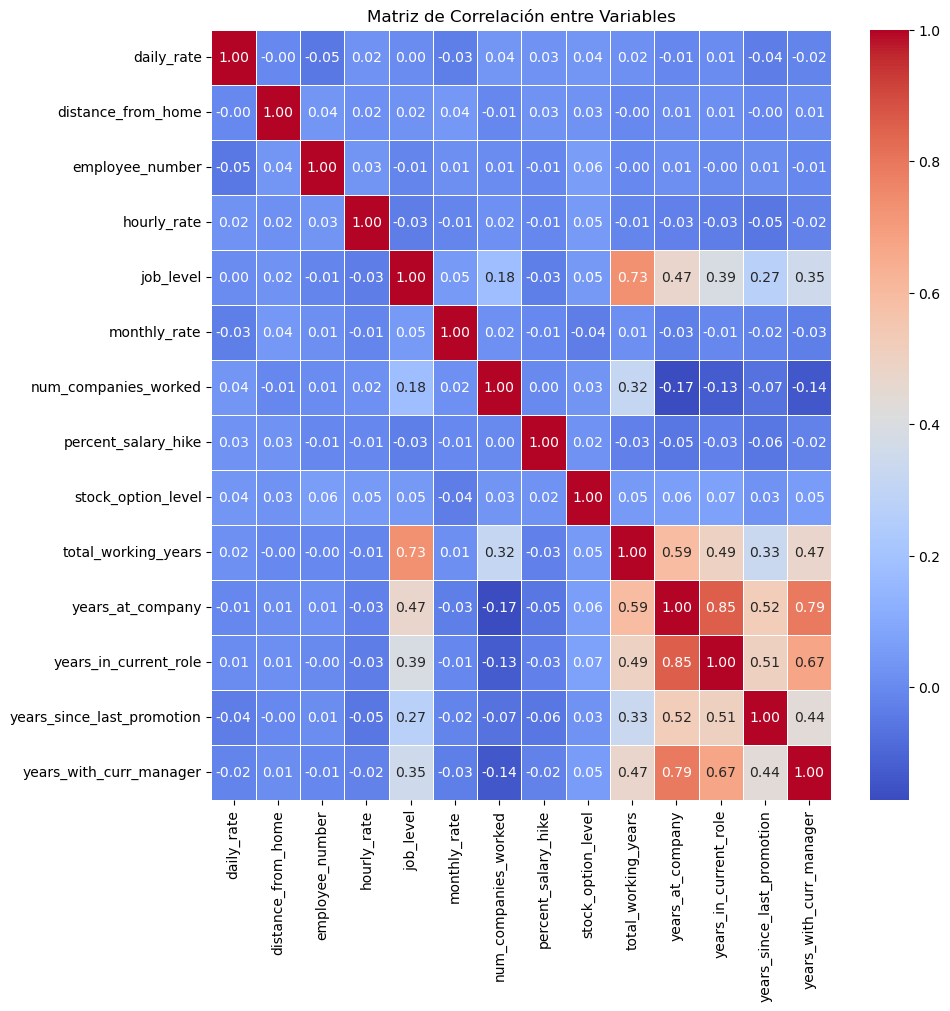

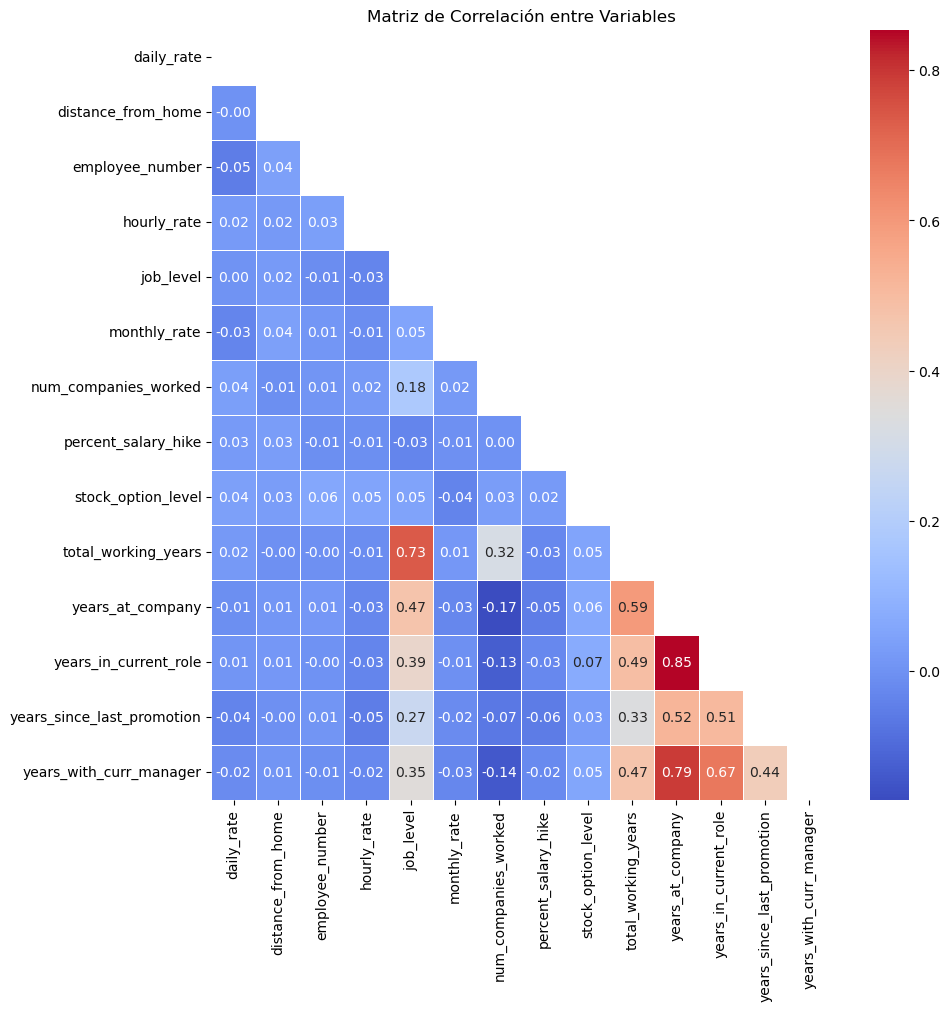

In [35]:
correlation_matrix = df_final.select_dtypes(include="number").corr(method="spearman")

# Visualiza la matriz de correlación utilizando seaborn
plt.figure(figsize=(10,10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Añade título
plt.title('Matriz de Correlación entre Variables')

# Muestra el gráfico

plt.show()



mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Crear una máscara para mostrar sólo la parte superior de la matriz
#mask = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, mask = mask, cmap='coolwarm', fmt='.2f', linewidths=.5)
# Añade título
plt.title('Matriz de Correlación entre Variables')
# Muestra el gráfico

plt.show()

## Educación y Evolución profesional

### Promedio años sin promoción según antigüedad en la empresa

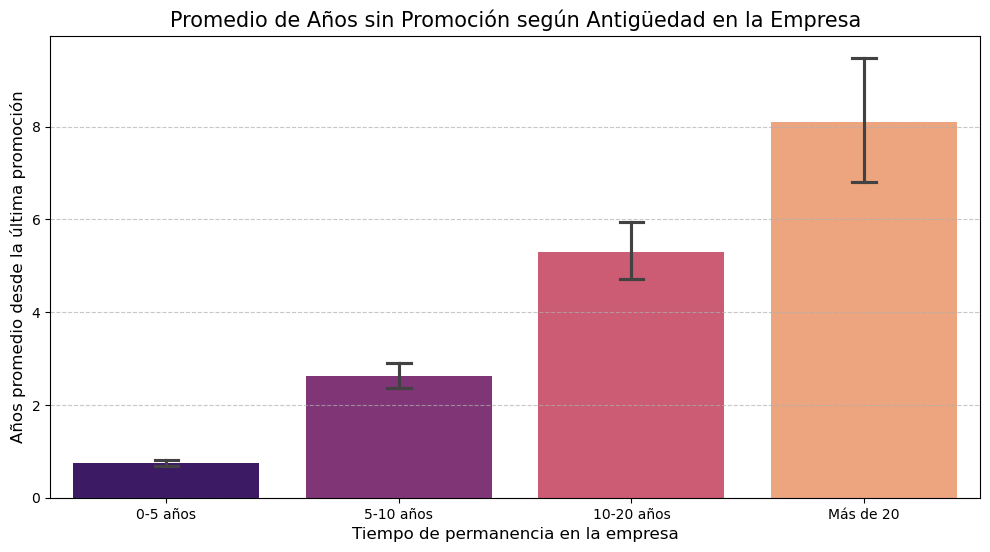

In [36]:
# 1. Creamos rangos de antigüedad para que sea más fácil de leer
df_final['rango_antiguedad'] = pd.cut(df_final['years_at_company'], 
                                     bins=[0, 5, 10, 20, 40], 
                                     labels=['0-5 años', '5-10 años', '10-20 años', 'Más de 20'])

# 2. Creamos el gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=df_final, x='rango_antiguedad', y='years_since_last_promotion', 
            palette='magma', capsize=.1)

plt.title('Promedio de Años sin Promoción según Antigüedad en la Empresa', fontsize=15)
plt.xlabel('Tiempo de permanencia en la empresa', fontsize=12)
plt.ylabel('Años promedio desde la última promoción', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

Análisis de Estancamiento Laboral

Esta gráfica de barras es una de las más reveladoras para un departamento de Recursos Humanos, ya que mide directamente el estancamiento laboral.

Aquí tienes la explicación detallada de lo que nos está diciendo:

---

1. ¿Qué representan los ejes?

* **Eje (Horizontal):** Agrupa a los empleados por su "edad" dentro de la empresa (tenure). Va desde los recién llegados (0-5 años) hasta los veteranos (más de 20 años).
* **Eje (Vertical):** Representa la media de años que han pasado desde que el empleado recibió su última promoción.

---

2. La Tendencia Principal: "El efecto acumulativo"

La gráfica muestra una escalera ascendente clara. Esto es lógico, pero nos da un dato interesante:

* En los primeros 5 años, la gente suele promocionar rápido (el promedio de espera es de menos de 1 año).
* Sin embargo, al permanecer 10-20 años en la empresa, el tiempo de espera se dispara a más de 5 años.
* Para los veteranos (más de 20 años), la espera media supera los 8 años.

Las líneas en la parte superior de cada barra indican la variabilidad o incertidumbre de los datos:

* En el grupo de 0-5 años, la línea es muy pequeña. Esto significa que casi todos los empleados nuevos viven la misma experiencia: promocionan rápido.
* En el grupo de Más de 20 años, la línea es mucho más larga. Esto indica que hay mucha desigualdad ya que algunos veteranos han promocionado hace poco, pero otros llevan aproximadamente 15 años en el mismo puesto, lo que ensancha el margen (outliers).

---

3. Conclusión:

La gráfica sugiere que la empresa tiene un **techo de cristal** o un embudo en las posiciones intermedias y senior. Mientras que el talento joven se mueve rápido, el talento con experiencia parece quedarse "atrapado" en sus roles por mucho más tiempo.

### Formación vs. Agilidad de Promoción

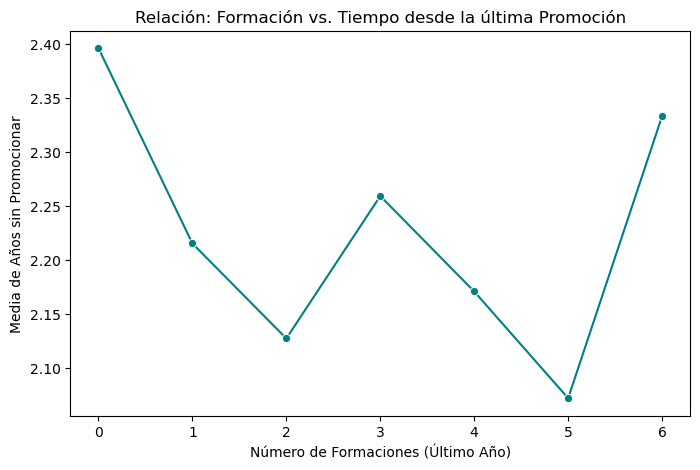

In [37]:
# Agrupamos por formaciones recibidas y calculamos la media de años desde la última promoción
promo_training = df_final.groupby('training_times_last_year')['years_since_last_promotion'].mean().reset_index()

# Gráfico
plt.figure(figsize=(8, 5))
sns.lineplot(data=promo_training, x='training_times_last_year', y='years_since_last_promotion', marker='o', color='teal')
plt.title('Relación: Formación vs. Tiempo desde la última Promoción')
plt.xlabel('Número de Formaciones (Último Año)')
plt.ylabel('Media de Años sin Promocionar')
plt.show()

* Conclusión: 

Este análisis evalúa si existe una correlación directa entre la cantidad de capacitaciones recibidas el año anterior (TrainingTimesLastYear) y la agilidad para obtener un ascenso (YearsSinceLastPromotion).

Punto Máximo de Espera: Empleados con 0 formaciones son los que más tiempo llevan esperando una promoción (aprox. 2.4 años).

Punto de Mayor Agilidad: Los empleados con 5 formaciones son los que promocionan más rápido, con una media de espera de solo 2.07 años.

El efecto rebote: Curiosamente, al llegar a 6 formaciones, el tiempo de espera vuelve a subir drásticamente hasta los 2.33 años.

* Conclusión Profesional: 

Los datos sugieren que la formación sí acelera la carrera profesional, pero solo hasta cierto punto. Existe una "zona óptima" de 2 a 5 formaciones anuales donde el tiempo de espera para un ascenso se reduce significativamente. Sin embargo, el repunte en 6 formaciones podría indicar un perfil de empleado muy especializado que se mantiene en su rol técnico sin saltar a niveles jerárquicos superiores, o una sobrecapacitación que no se traduce en movimientos internos.

* Recomendaciones Estratégicas para RRHH:

Fomentar la Capacitación Activa: Es evidente que el grupo con 0 formación está estancado. RRHH debe intervenir proactivamente ofreciendo al menos 2 cursos anuales para reactivar su línea de carrera.

Identificar el "Techo del Especialista": Investigar por qué los empleados con 6 formaciones tardan más en promocionar. Si son perfiles clave, se deben crear itinerarios de promoción técnica (expertos) paralelos a los de gestión para que su formación se traduzca en crecimiento jerárquico.

Optimización del Presupuesto: Dado que el beneficio en agilidad de promoción es máximo con 5 formaciones, este debería ser el objetivo recomendado para los planes de desarrollo individual (PDI).

### Educación con rol

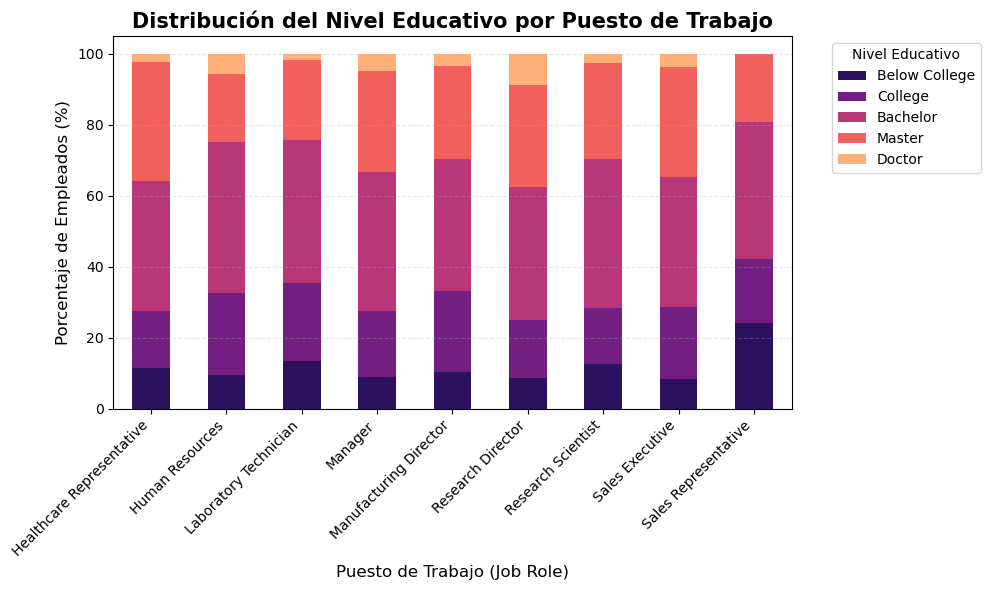

In [38]:
# 1. Creamos una tabla de porcentajes para ver la proporción de educación por puesto
# Usamos 'normalize=index' para que cada barra sume 100%
edu_puesto = pd.crosstab(df_final['job_role'], df_final['education'], normalize='index') * 100

# 2. Definimos el orden lógico de los niveles educativos para la leyenda
orden_edu = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']
edu_puesto = edu_puesto.reindex(columns=orden_edu)

# 3. Graficamos (usando la paleta 'magma' que ya tienes en tu proyecto)
edu_puesto.plot(kind='bar', stacked=True, figsize=(10, 6), 
                color=sns.color_palette('magma', n_colors=5))

# Configuración estética
plt.title('Distribución del Nivel Educativo por Puesto de Trabajo', fontsize=15, fontweight='bold')
plt.xlabel('Puesto de Trabajo (Job Role)', fontsize=12)
plt.ylabel('Porcentaje de Empleados (%)', fontsize=12)
plt.legend(title='Nivel Educativo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()

Análisis de Nivel Educativo vs. Puesto de Trabajo

* Conclusión:

El análisis de la formación académica según el rol desempeñado revela una estructura de especialización donde los grados superiores están directamente vinculados a la dirección y la investigación científica.

- **Cualificación en Liderazgo**: Los puestos de **Manager** y **Research Director** concentran la mayor proporción de perfiles con **Doctorado** y **Máster**, validando que la empresa exige alta especialización académica para sus puestos de máxima responsabilidad.
- **Estandarización en Ventas**: Los **Sales Executive** presentan una base muy sólida de **Bachelors** (Grados), siendo este el perfil estándar para la fuerza comercial estratégica.
- **Diversidad en Roles Operativos**: Puestos como **Laboratory Technician** y **Sales Representative** muestran una mayor presencia de niveles "Below College" y "College", lo que indica que son puertas de entrada a la organización donde se prioriza la formación técnica o habilidades prácticas sobre los títulos de postgrado.

* Conclusión Profesional:

La organización demuestra una correlación positiva entre el nivel educativo y la jerarquía del puesto. Existe un "pasillo académico" claro para el ascenso: mientras que los roles operativos permiten perfiles de formación media, el acceso a la alta dirección técnica y estratégica parece estar condicionado a la obtención de títulos de postgrado. Esta estructura asegura que el conocimiento experto lidere las áreas críticas, pero también establece un estándar académico alto para el crecimiento interno en departamentos como I+D.

* Recomendaciones Estratégicas para RRHH:

- **Programas de Becas para Crecimiento**: Identificar empleados de alto desempeño en roles de **Laboratory Technician** que solo tengan grado y ofrecerles apoyo para cursar un Máster, facilitando su transición a **Research Scientist**.
- **Revisión de Requisitos de Entrada**: Evaluar si para roles de **Sales Representative** se podría ampliar la captación de talento joven con formación profesional, dado que la formación universitaria no parece ser un factor crítico de éxito inmediato en este puesto.
- **Mentoría Técnica**: Fomentar que los **Research Directors** (con mayor nivel de Doctorado) lideren programas de mentoría para los niveles de entrada, asegurando que el conocimiento académico se transfiera de forma práctica a toda la escala operativa.

### Relación entre nivel educativo e ingresos mensuales

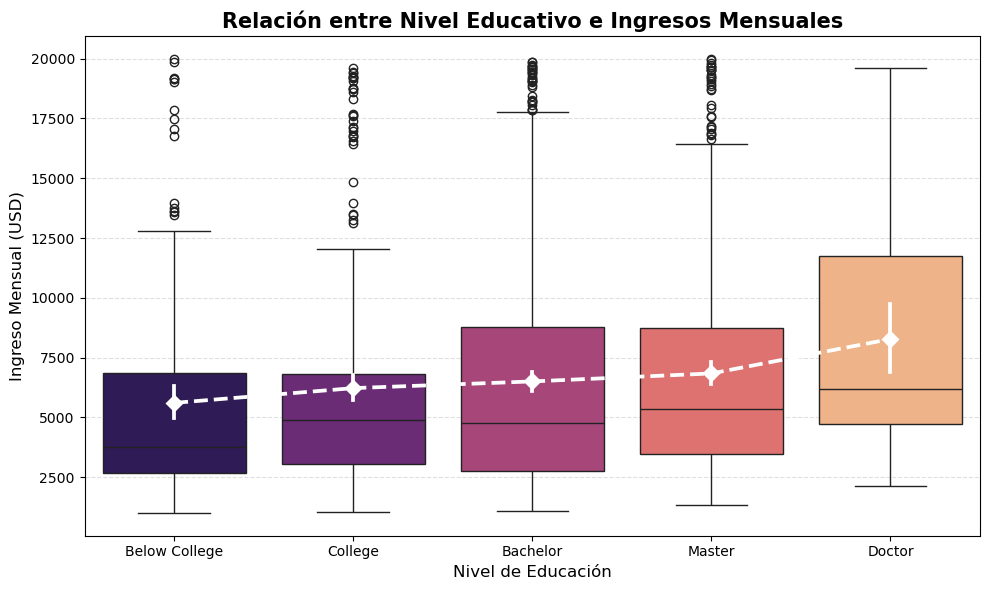

In [39]:
# 1. Definimos el orden lógico de los niveles educativos
orden_edu = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']

# 2. Creamos el gráfico de caja (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final, x='education', y='monthly_income', 
            order=orden_edu, palette='magma')

# 3. Añadimos una línea con la media para ver la tendencia clara
sns.pointplot(data=df_final, x='education', y='monthly_income', 
              order=orden_edu, color='white', markers='D', linestyles='--')

# Configuración estética
plt.title('Relación entre Nivel Educativo e Ingresos Mensuales', fontsize=15, fontweight='bold')
plt.xlabel('Nivel de Educación', fontsize=12)
plt.ylabel('Ingreso Mensual (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

plt.show()

Análisis de Nivel Educativo vs. Ingresos Mensuales

* Conclusión:

El análisis confirma una tendencia ascendente clara: a mayor nivel de formación académica, mayor es el rango salarial percibido por el empleado, aunque con matices interesantes en los niveles intermedios.

- **Impacto del Doctorado**: Los empleados con nivel **Doctor** no solo tienen los ingresos medios más altos, sino que su "suelo salarial" está significativamente por encima del resto, lo que indica que el título de doctor garantiza un nivel retributivo premium en la organización.
- **Solapamiento en Niveles Medios**: Existe un gran solapamiento entre los niveles **College**, **Bachelor** y **Master**. Esto sugiere que, en el tramo medio de la empresa, la experiencia previa o el puesto específico pueden tener más peso en el salario que el título exacto que se posea.
- **Valores Atípicos (Outliers)**: Se observan puntos aislados en los niveles inferiores (Below College) con salarios muy altos. Esto representa perfiles "estrella" que, a pesar de no tener estudios superiores, han alcanzado puestos de alta remuneración gracias a su trayectoria interna.

* Conclusión Profesional:

La estructura salarial de la empresa es **meritocrática desde el punto de vista académico**. La inversión en educación superior tiene un retorno directo en el salario mensual, especialmente al saltar al nivel de Doctorado. Sin embargo, la similitud de rangos entre Grado (Bachelor) y Máster indica que el mercado interno valora de forma muy parecida estos dos niveles, posiblemente porque las competencias requeridas para los puestos de gestión intermedia se adquieren más por la práctica que por el título adicional.

* Recomendaciones Estratégicas para RRHH:

- **Revisión de la "Prima de Máster"**: Evaluar si los incentivos para realizar un Máster son suficientes, ya que actualmente la diferencia salarial con los graduados no es tan marcada. Se podrían crear bonos específicos por titulación para incentivar la formación continua.
- **Retención de Doctores**: Dado que son el grupo más caro y cualificado, RRHH debe asegurar que sus funciones estén alineadas con la investigación y la estrategia de alto nivel para justificar la inversión en su nómina.
- **Valoración de la Experiencia**: Reconocer formalmente a los empleados de nivel "Below College" que tienen salarios altos. Ellos poseen un "know-how" crítico que no depende de títulos; identificarlos como mentores internos sería un movimiento muy inteligente para la cultura de la empresa.

### Nivel jerárquico medio según la frecuencia de viaje

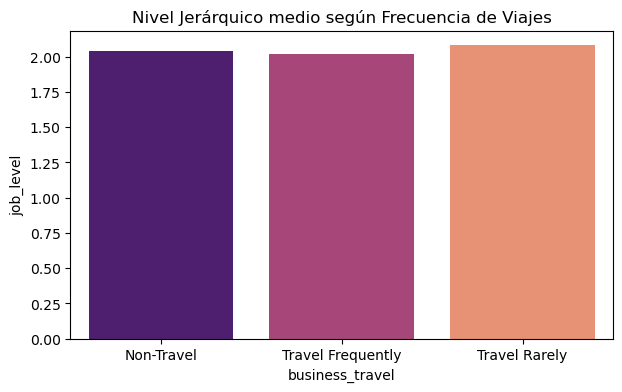

In [40]:
job_travel = df_final.groupby('business_travel')['job_level'].mean().reset_index()

# Gráfico
plt.figure(figsize=(7, 4))
sns.barplot(data=job_travel, x='business_travel', y='job_level', palette='magma')
plt.title('Nivel Jerárquico medio según Frecuencia de Viajes')
plt.show()

#### Conclusión:

Este análisis permite identificar si la movilidad geográfica es un requisito implícito para alcanzar niveles de responsabilidad superiores en la compañía.

Viajes Frecuentes (Travel_Frequently): Presentan un nivel jerárquico medio de 2.01.

Viajes Raros (Travel_Rarely): Curiosamente, este grupo lidera con el nivel jerárquico medio más alto: 2.08.

Sin Viajes (Non-Travel): Se mantienen en un nivel intermedio de 2.04.

* Conclusión Profesional: 

Los datos revelan un hallazgo inesperado: no existe una correlación directa entre viajar más y tener un puesto más alto. De hecho, los empleados que viajan "Rara vez" ostentan niveles jerárquicos ligeramente superiores a quienes viajan "Frecuentemente". Esto sugiere que la estructura de liderazgo de la empresa no depende de la presencia física constante en diferentes sedes, lo que indica una cultura orientada a la gestión por objetivos más que a la movilidad.

* Recomendaciones Estratégicas para RRHH:

Revisión de la Carga de Viaje en Niveles Medios: Dado que los perfiles con viajes frecuentes no tienen mayor rango jerárquico (2.01), es vital asegurar que esta exigencia de movilidad no esté penalizando su calidad de vida sin una compensación jerárquica clara.

Optimización del Trabajo en Remoto: Al observar que los niveles más altos (2.08) viajan poco, la empresa tiene una oportunidad de oro para estandarizar modelos de liderazgo híbrido o remoto, demostrando que se puede dirigir con éxito sin necesidad de desplazamientos constantes.

Encuesta de Retención para Viajeros: Debido a que el grupo de "Viajes Frecuentes" tiene el nivel jerárquico más bajo de los tres, RRHH debería vigilar su tasa de rotación; el desgaste por viaje sin una progresión de carrera superior al resto podría generar fugas de talento.

### Análisis de Satisfacción por Puesto de Trabajo

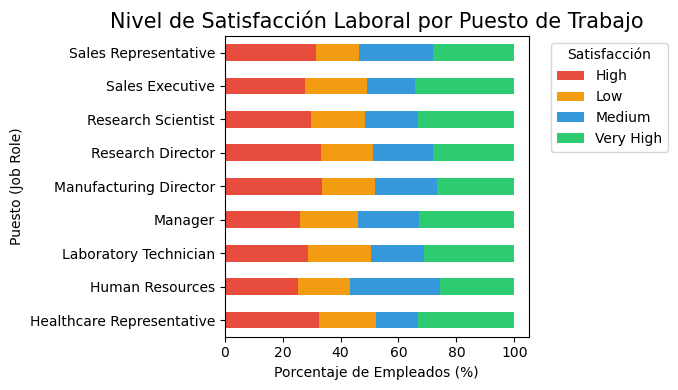

In [41]:
# 1. Creamos una tabla de porcentajes para comparar roles de distintos tamaños
rol_satisfaccion = pd.crosstab(df_final['job_role'], df_final['job_satisfaction'], normalize='index') * 100

# 2. Graficamos
rol_satisfaccion.plot(kind='barh', stacked=True, figsize=(7,4), 
                      color=['#e74c3c', '#f39c12', '#3498db', '#2ecc71'])

plt.title('Nivel de Satisfacción Laboral por Puesto de Trabajo', fontsize=15)
plt.xlabel('Porcentaje de Empleados (%)')
plt.ylabel('Puesto (Job Role)')
plt.legend(title='Satisfacción', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

Esta visualización de barras apiladas muestra la distribución porcentual de los niveles de **Satisfacción Laboral** dentro de cada **Puesto de Trabajo** (Job Role).

1. ¿Qué representan los ejes?

* **Eje (Horizontal):** Representa el porcentaje acumulado (0-100%) de empleados dentro de cada rol, segmentado por colores según su nivel de satisfacción.
* **Eje (Vertical):** Lista los diferentes puestos de trabajo (Job Roles) presentes en la empresa.

---

2. Tendencias Principales

La gráfica permite comparar la "felicidad" relativa entre departamentos de forma equitativa:

* **Homogeneidad en la insatisfacción:** La proporción de empleados con satisfacción **"Low"** (naranja) es muy similar en casi todos los puestos, rondando entre el 15% y el 20%. Esto sugiere que la insatisfacción no está ligada a un rol específico.
* **Puestos con mayor entusiasmo:** Si sumamos las categorías **"High"** (rojo) y **"Very High"** (verde), roles como *Sales Representative*, *Healthcare Representative* y *Research Director* muestran el personal más comprometido.
* **Neutralidad en RR.HH.:** El puesto de *Human Resources* presenta la barra de satisfacción **"Medium"** (azul) más ancha, indicando un estado de conformidad intermedia en este equipo.

---

3. Conclusión:

La gráfica sugiere que la empresa goza de una salud laboral estable en todos sus niveles, ya que no hay un "puesto crítico" con descontento mayoritario. Sin embargo, existe una oportunidad de mejora para convertir el grueso de satisfacción "Medium" y "High" en niveles "Very High" mediante políticas de motivación específicas por departamento.

## Género

### Acceso a promociones según género

In [42]:
# Calculamos la media de años desde la última promoción por género

promotion_by_gender = (
    df_final.groupby('gender')['years_since_last_promotion']
      .mean()
      .reset_index()
)

promotion_by_gender

,gender,years_since_last_promotion
0,Female,2.294218
1,Male,2.116780


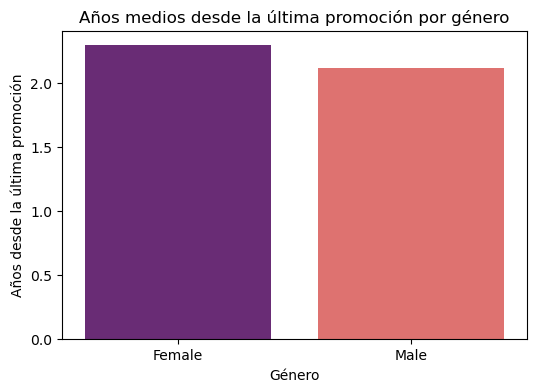

In [43]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=promotion_by_gender,
    x='gender',
    y='years_since_last_promotion',
    palette= 'magma'
)

plt.title('Años medios desde la última promoción por género')
plt.xlabel('Género')
plt.ylabel('Años desde la última promoción')
plt.show()


* Conclusión


Al analizar la gráfica de "Años medios desde la última promoción por género", se observa una métrica clave para entender la velocidad de crecimiento dentro de la organización.

Esta métrica evalúa el tiempo promedio que transcurre antes de que un empleado reciba un ascenso, segmentado por género.

Mujeres (Female): Aproximadamente 2.3 años.

Hombres (Male): Aproximadamente 2.1 años.

Existe una ligera disparidad en los tiempos de promoción. En promedio, las mujeres esperan cerca de un 10% más de tiempo que sus compañeros masculinos para ser promocionadas. Aunque la diferencia absoluta es pequeña (aprox. 0.2 años), es un indicador que merece atención para asegurar que el desarrollo de carrera sea totalmente equitativo.

* Recomendaciones Estratégicas:

Auditoría de Promociones: Se recomienda revisar los criterios de evaluación de desempeño para asegurar que sean 100% objetivos y no existan sesgos inconscientes que retrasen el avance del talento femenino.

Programas de Mentoría: Implementar iniciativas de acompañamiento para mujeres en niveles medios (donde ya vimos que tienen un JobLevel alto) para acelerar su transición hacia puestos de mayor responsabilidad.

Análisis por Departamento: Sería ideal desglosar estos datos por áreas; a veces una brecha general es causada por un solo departamento con prácticas menos inclusivas.

### Nivel jerárquico según género

In [44]:
joblevel_by_gender = (
    df_final.groupby('gender')['job_level']
      .mean()
      .reset_index()
)

joblevel_by_gender

,gender,job_level
0,Female,2.117347
1,Male,2.028345


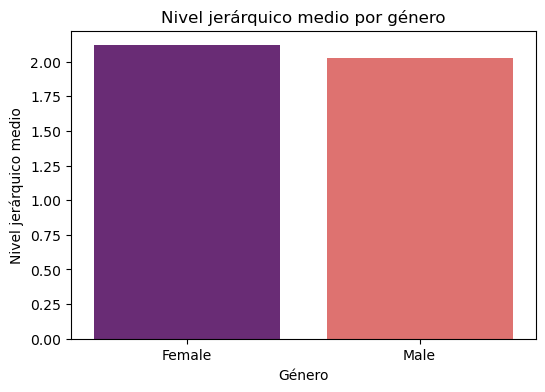

In [45]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=joblevel_by_gender,
    x='gender',
    y='job_level',
    palette= 'magma'
)

plt.title('Nivel jerárquico medio por género')
plt.xlabel('Género')
plt.ylabel('Nivel jerárquico medio')
plt.show()

* Conclusión:

Los datos revelan una equidad sustancial en la jerarquía de la empresa. De hecho, el talento femenino presenta un nivel jerárquico medio ligeramente superior (0.089 puntos por encima) al masculino.

Interpretación para RRHH:

Acceso a Oportunidades: No se detecta un "techo de cristal" inmediato en los niveles medios, ya que ambos géneros orbitan el nivel 2 de forma equilibrada.

Retención de Talento: La paridad en el JobLevel sugiere que las políticas de promoción interna se están aplicando con criterios objetivos, logrando una distribución equitativa de las responsabilidades.

### Género, antigüedad y progresión jerárquica

In [46]:
# Definimos tramos de antigüedad
bins = [0, 5, 10, 15, 20, df_final['years_at_company'].max()]
labels = ['0-5 años', '6-10 años', '11-15 años', '16-20 años', 'Más de 20 años']

df_final['tenure_group'] = pd.cut(
    df_final['years_at_company'],
    bins=bins,
    labels=labels,
    right=True
)

df_final[['years_at_company', 'tenure_group']].head()

,years_at_company,tenure_group
0,6,6-10 años
1,10,6-10 años
2,0,NaN
3,8,6-10 años
4,2,0-5 años


In [47]:
joblevel_tenure_gender = (
    df_final.groupby(['tenure_group', 'gender'])['job_level']
      .mean()
      .reset_index()
)

joblevel_tenure_gender

,tenure_group,gender,job_level
0,0-5 años,Female,1.751748
1,0-5 años,Male,1.663677
2,6-10 años,Female,2.143678
3,6-10 años,Male,2.131387
4,11-15 años,Female,2.588235
5,11-15 años,Male,2.263158
6,16-20 años,Female,3.157895
7,16-20 años,Male,3.088235
8,Más de 20 años,Female,3.875000
9,Más de 20 años,Male,4.476190


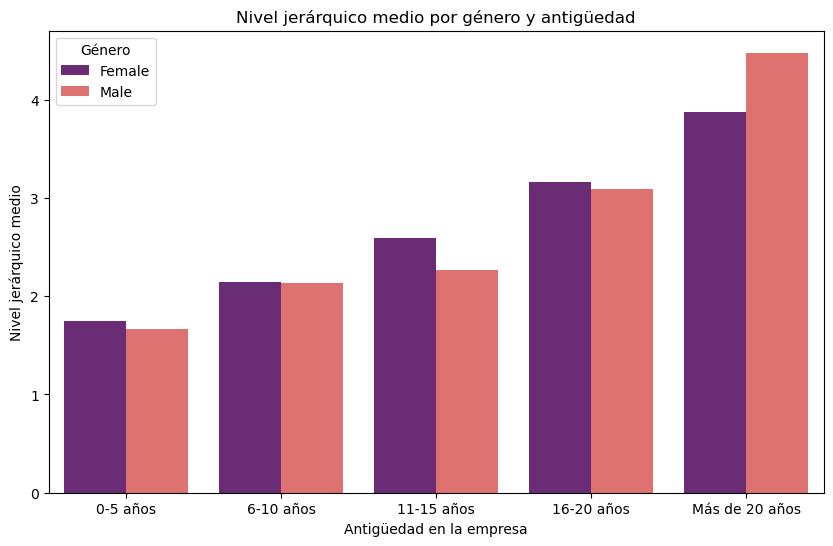

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=joblevel_tenure_gender,
    x='tenure_group',
    y='job_level',
    hue='gender',
    palette='magma'
)

plt.title('Nivel jerárquico medio por género y antigüedad')
plt.xlabel('Antigüedad en la empresa')
plt.ylabel('Nivel jerárquico medio')
plt.legend(title='Género')
plt.show()

#### Conclusión

Evolución de la Carrera Profesional (Género vs. Antigüedad)
Este gráfico de barras agrupadas permite visualizar si el crecimiento jerárquico dentro de la empresa sigue un ritmo equitativo a medida que los empleados acumulan años de experiencia.

0-15 años de antigüedad: El talento femenino mantiene un nivel jerárquico medio ligeramente superior al masculino en todos los tramos iniciales.

16-20 años de antigüedad: Se observa una paridad casi absoluta, con las mujeres manteniendo una mínima ventaja en el nivel de puesto.

Más de 20 años de antigüedad: Es el único segmento donde el nivel jerárquico masculino supera claramente al femenino, alcanzando el nivel más alto de la gráfica (cercano al nivel 4.5).

* Conclusiones Clave para RRHH:

Liderazgo Femenino Consistente: En las primeras dos décadas de carrera, las mujeres no solo compiten en igualdad, sino que alcanzan niveles jerárquicos ligeramente superiores a sus compañeros con la misma antigüedad.

El Techo de Cristal Tardío: La brecha que aparece a partir de los 20 años de antigüedad sugiere que, históricamente, los puestos de altísima dirección (Nivel 4-5) han sido ocupados mayoritariamente por hombres. Esto podría deberse a dinámicas de promociones de hace décadas que aún se reflejan en la plantilla más veterana.

Tendencia de Cambio: La superioridad del nivel femenino en los tramos más jóvenes (0-15 años) indica que las políticas actuales de equidad están funcionando y que las futuras promociones a la alta dirección probablemente sean mucho más equilibradas.

Recomendación: Focalizar los planes de sucesión para los puestos de máximo nivel en las mujeres que se encuentran actualmente en el tramo de 16-20 años, para cerrar la brecha histórica detectada en el segmento de más de 20 años de antigüedad.

### Género y nivel jerárquico

In [49]:
joblevel_by_gender = (
    df_final.groupby('gender')['job_level']
      .mean()
      .reset_index()
)

joblevel_by_gender

,gender,job_level
0,Female,2.117347
1,Male,2.028345


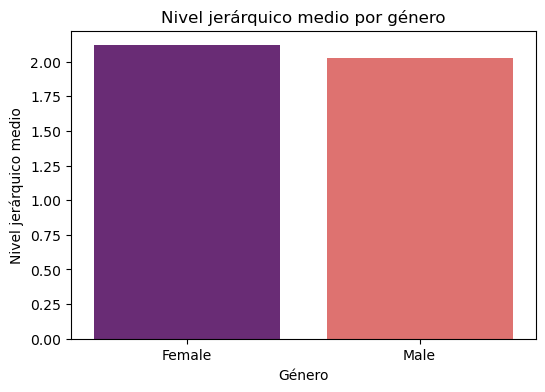

In [50]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=joblevel_by_gender,
    x='gender',
    y='job_level',
    palette='magma'
)

plt.title('Nivel jerárquico medio por género')
plt.xlabel('Género')
plt.ylabel('Nivel jerárquico medio')
plt.show()

#### Conclusión:

Los datos revelan una equidad sustancial en la jerarquía de la empresa. De hecho, el talento femenino presenta un nivel jerárquico medio ligeramente superior (0.089 puntos por encima) al masculino.

Interpretación para RRHH:

Acceso a Oportunidades: No se detecta un "techo de cristal" inmediato en los niveles medios, ya que ambos géneros orbitan el nivel 2 de forma equilibrada.

Retención de Talento: La paridad en el JobLevel sugiere que las políticas de promoción interna se están aplicando con criterios objetivos, logrando una distribución equitativa de las responsabilidades.


### Género e incremento salarial

In [51]:
salary_hike_by_gender = (
    df_final.groupby('gender')['percent_salary_hike']
      .mean()
      .reset_index()
)

salary_hike_by_gender

,gender,percent_salary_hike
0,Female,15.197279
1,Male,15.217687


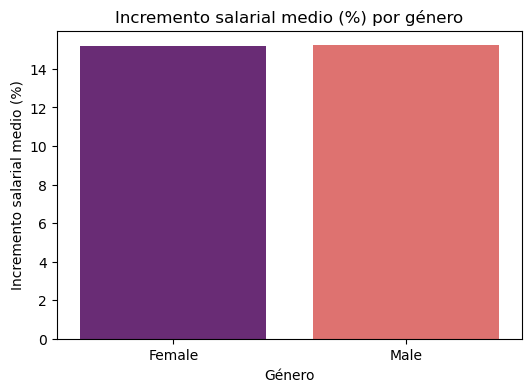

In [52]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=salary_hike_by_gender,
    x='gender',
    y='percent_salary_hike',
    palette= 'magma'
)

plt.title('Incremento salarial medio (%) por género')
plt.xlabel('Género')
plt.ylabel('Incremento salarial medio (%)')
plt.show()

#### Conclusión

Tras analizar el porcentaje de incremento salarial (PercentSalaryHike) desglosado por género, los resultados son los siguientes:

Mujeres (Female): 15.19%

Hombres (Male): 15.21%

Interpretación de los hallazgos:

Paridad Salarial: La diferencia entre ambos géneros es de apenas un 0.02%, lo que representa una igualdad prácticamente perfecta en las políticas de aumento salarial de la compañía.

Criterios Objetivos: Esta similitud tan estrecha sugiere que los incrementos se basan en méritos, rendimiento o escalas preestablecidas, sin sesgos de género detectables en esta métrica.

Salud Organizacional: Para el departamento de RRHH, este es un indicador clave de éxito en materia de igualdad de oportunidades, reforzando una cultura empresarial justa y transparente.

### Género con departamento

In [53]:
department_by_gender = (df_final.groupby(['department', 'gender'])
                        .size()
                        .reset_index(name='count'))

department_by_gender

,department,gender,count
0,Human Resources,Female,20
1,Human Resources,Male,43
2,Research & Development,Female,372
3,Research & Development,Male,567
4,Sales,Female,188
5,Sales,Male,251


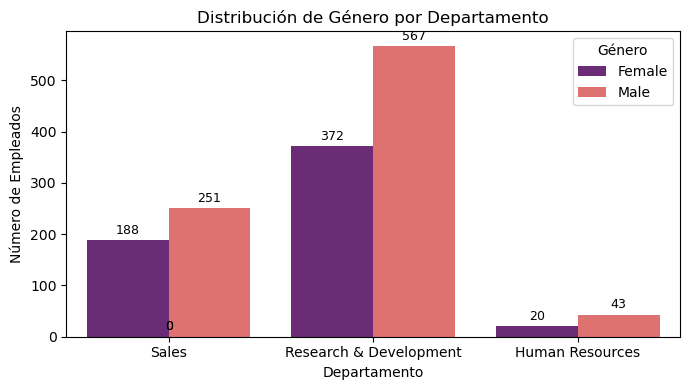

In [54]:
# Configuración del tamaño de la figura (7, 4)
plt.figure(figsize=(7, 4))

# Gráfico de recuento segmentado por género
ax = sns.countplot(data=df_final, x='department', hue='gender', palette='magma')

# Añadir etiquetas de valor sobre las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 7), 
                textcoords='offset points',
                fontsize=9)

plt.title('Distribución de Género por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Número de Empleados')
plt.legend(title='Género')
plt.tight_layout()
plt.show()

##### Conclusión:

El análisis de la composición de la plantilla por departamento revela una estructura organizacional donde el área de *Research & Development* concentra el mayor volumen de personal, manteniendo una distribución con predominancia masculina en todas las unidades de negocio.

- Predominancia en I+D: El departamento de *Research & Development* es el motor principal de la empresa con un total de 939 empleados, de los cuales 567 son hombres y 372 son mujeres.
- Equilibrio Relativo en Ventas: El área de Sales cuenta con 439 empleados, mostrando una brecha de género de 63 personas entre hombres (251) y mujeres (188).
- Especialización en RRHH: El departamento de *Human Resources* es el más compacto con 63 empleados, manteniendo la tendencia de la empresa con 43 hombres y 20 mujeres.

* Conclusión Profesional:

La organización presenta una estructura de género consistente a través de sus departamentos, con una representación masculina que oscila entre el 57% y el 68% dependiendo del área. El hecho de que la distribución sea similar en departamentos tan distintos como Ventas e Investigación sugiere que la brecha de representación es una característica estructural de la base de contratación de la empresa y no un fenómeno aislado de un área técnica. La alta concentración de talento en *Research & Development* subraya la naturaleza tecnológica de la compañía, donde la captación y retención de talento femenino sigue siendo el principal reto para alcanzar la paridad.

* Recomendaciones Estratégicas para RRHH:

- Atracción de Talento en I+D: Dado que *Research & Development* es el área con mayor volumen de hombres (567), RRHH debería implementar programas de captación dirigidos específicamente a mujeres en áreas STEM para diversificar el núcleo de innovación de la empresa.
- Auditoría de Desarrollo en Ventas: Con 188 mujeres en el departamento de *Sales*, se recomienda verificar si las oportunidades de ascenso a roles directivos son equitativas, asegurando que la mayoría masculina en volumen no se traduzca en un sesgo automático en la toma de decisiones.
- Optimización de Recursos Humanos: Siendo el área más pequeña (63 empleados), este equipo debe contar con las herramientas de diversidad necesarias para liderar el cambio cultural hacia una organización más balanceada en los departamentos de mayor escala.

## Edad

### Nivel jerárquico según la edad

In [55]:
job_level_by_age = (df_final.groupby('job_role')['age']
                            .mean()
                            .round(2)
                            .reset_index()
)

job_level_by_age

,job_role,age
0,Healthcare Representative,39.945312
1,Human Resources,35.08
2,Laboratory Technician,34.132231
3,Manager,46.755319
4,Manufacturing Director,38.430657
5,Research Director,43.794872
6,Research Scientist,34.232143
7,Sales Executive,36.951613
8,Sales Representative,30.333333


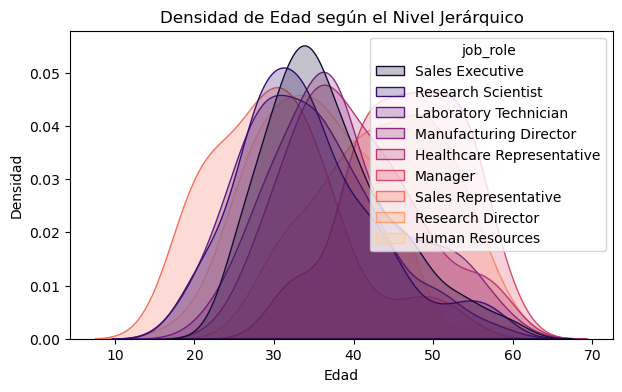

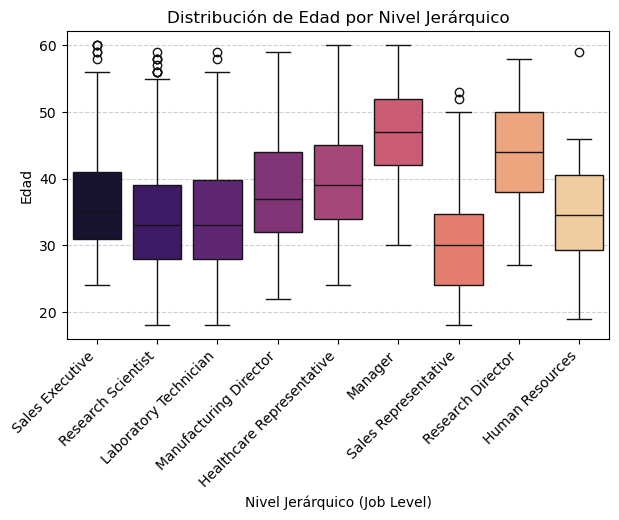

In [56]:
plt.figure(figsize=(7, 4))
sns.kdeplot(data=df_final, x='age', hue='job_role', fill=True, palette='magma', common_norm=False)

plt.title('Densidad de Edad según el Nivel Jerárquico')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()


plt.figure(figsize=(7, 4))
sns.boxplot(data=df_final, x='job_role', y='age', palette='magma')

plt.title('Distribución de Edad por Nivel Jerárquico')
plt.xlabel('Nivel Jerárquico (Job Level)')
plt.ylabel('Edad')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#### Conclusión:
Este análisis revela una estructura organizacional basada en la experiencia acumulada, donde la edad actúa como un indicador de la progresión jerárquica, aunque con matices interesantes en roles técnicos y de ventas.

- Liderazgo Consolidado: Los roles de *Manager* (media de 46.76 años) y *Research Director* (43.79 años) presentan las distribuciones de edad más altas y compactas. Esto indica que el acceso a estos puestos requiere una madurez profesional significativa.
- Puertas de Entrada: El puesto de *Sales Representative* destaca por ser el más joven (media de 30.33 años), con una densidad que se concentra fuertemente entre los 20 y 35 años.
- Segmento Operativo: Los técnicos de laboratorio y científicos de investigación muestran una gran similitud demográfica, con medias de 34.13 y 34.23 años respectivamente.

* Conclusión Profesional: 
La empresa presenta una pirámide demográfica saludable pero muy marcada por el rol. Mientras que el gráfico de densidad muestra solapamientos en la franja de los 30-40 años para la mayoría de los puestos, los *Managers* se separan claramente hacia el extremo superior de la escala. Un hallazgo clave es la presencia de **outliers** (puntos aislados) en el boxplot de roles como *Sales Executive* o *Research Scientist*, donde personas cercanas a los 60 años ocupan puestos que normalmente tienen medias mucho más bajas; esto sugiere la existencia de especialistas senior que aportan valor desde roles ejecutivos sin necesariamente transicionar a la gestión de personas.

* Recomendaciones Estratégicas para RRHH:

- Brecha Generacional en Ventas: Existe un salto notable de más de 6 años entre el Sales Representative (30.33) y el Sales Executive (36.95). RRHH debería auditar si el plan de carrera interno permite una transición fluida para evitar la fuga de talento joven hacia la competencia durante este periodo de crecimiento.
- Gestión del Conocimiento Senior: Dado que los Managers y Research Directors tienen las medias de edad más altas, es vital implementar programas de *mentoring* donde estos perfiles transfieran conocimiento crítico a los Healthcare Representatives y **Manufacturing Directors (medias de 38-39 años), quienes son los sucesores naturales.

### Sueldo según educación

In [57]:
monthly_income_by_education = (df_final.groupby('education_field')['monthly_income']
                            .mean()
                            .reset_index()
)

monthly_income_by_education

,education_field,monthly_income
0,Human Resources,7733.565217
1,Life Sciences,6485.027778
2,Marketing,7390.489933
3,Medical,6499.719457
4,Other,5767.782051
5,Technical Degree,5802.946154


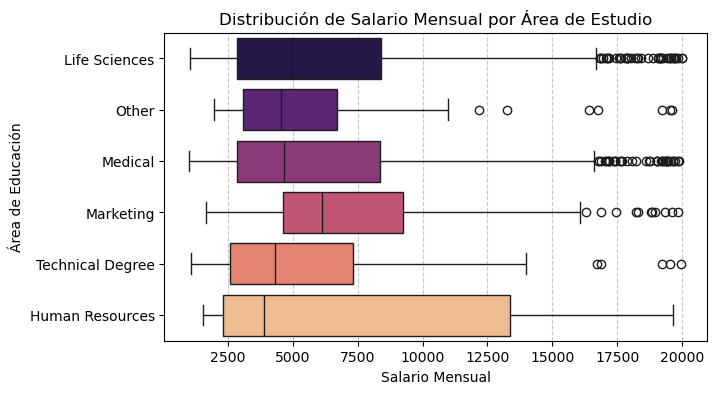

In [58]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df_final, x='monthly_income', y='education_field', palette='magma')

plt.title('Distribución de Salario Mensual por Área de Estudio')
plt.xlabel('Salario Mensual')
plt.ylabel('Área de Educación')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#### Conclusión:

Este análisis permite identificar cómo la formación académica de origen influye en el potencial económico dentro de la organización, revelando que el área de estudio no solo determina el salario base, sino también la amplitud de crecimiento (techos salariales).

- Picos de Ingresos y Liderazgo: El área de Human Resources destaca con el promedio mensual más alto (aprox 7,733) y una de las cajas más extendidas en el boxplot, lo que indica que, aunque hay mucha variabilidad, es el área con mayor potencial de alcanzar los rangos salariales máximos (cerca de 20,000).

- Consistencia en Marketing: Marketing muestra un promedio sólido (aprox 7,390) y una mediana visualmente más alta que la mayoría, con una dispersión equilibrada, lo que sugiere una estructura salarial competitiva y estable.

- Zonas de Salario Técnico: Las áreas de Technical Degree y Other presentan los promedios más bajos (aprox 5,802 y 5,767 respectivamente). En el gráfico de cajas, se observa que sus techos salariales son más limitados en comparación con las áreas de gestión o ciencias.

* Conclusión Profesional:

A diferencia de otras variables, el área de estudio genera una segmentación clara en la capacidad de ahorro y remuneración. Mientras que Life Sciences y Medical tienen promedios similares (aprox 6,400), presentan una gran cantidad de outliers (puntos aislados a la derecha), lo que sugiere que en estas áreas el título es solo el punto de entrada, y que la especialización posterior o el nivel jerárquico son los que disparan el salario. Por el contrario, en Human Resources, el área de estudio parece abrir la puerta a rangos salariales muy diversos, desde niveles iniciales hasta la alta dirección.

* Recomendaciones Estratégicas para RRHH:

- Revisión de Equidad para Perfiles Técnicos: Dado que los perfiles de Technical Degree muestran los salarios más bajos y menor dispersión, RRHH debería evaluar si existe un "techo de cristal" para estos empleados y si es necesario crear planes de carrera que les permitan saltar a bandas salariales de gestión.

- Ajuste de Expectativas en Reclutamiento: Para las áreas de Life Sciences y Medical, donde hay muchos valores atípicos, se recomienda auditar qué competencias permiten a esos empleados ganar por encima de la media, con el fin de estandarizar los criterios de promoción.

- Fomento de la Polivalencia: Dado el alto valor percibido en el mercado interno para los perfiles de Marketing y HR, se podrían crear programas de reskilling para que empleados de áreas con salarios más estancados puedan transicionar hacia estos roles con mayor potencial económico.

### Edad con tarifa mensual

In [59]:
# 1. Creamos una nueva columna temporal para el rango
df_final = df_final.dropna(subset=['age'])

bins_edad = [18, 26, 36, 46, 56, 100]
labels_edad = ['18-25', '26-35', '36-45', '46-55', '56+']

df_final['age_range'] = pd.cut(df_final['age'], bins=bins_edad, labels=labels_edad, right=False)

# 3. Aplicamos el groupby usando esa nueva columna
monthly_rate_by_age_range = (df_final.groupby('age_range')['monthly_rate']
                             .mean()
                             .round(2)
                             .reset_index()
                            )

monthly_rate_by_age_range

,age_range,monthly_rate
0,18-25,15175.83
1,26-35,14218.15
2,36-45,13586.67
3,46-55,15415.27
4,56+,15559.58


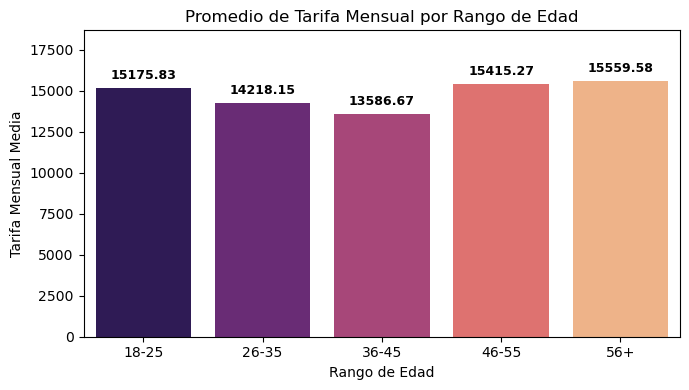

In [60]:
df_final['age_range'] = pd.cut(df_final['age'], bins=bins_edad, labels=labels_edad, right=False)

# 2. Agrupar y calcular la media redondeada
monthly_rate_by_age = (df_final.groupby('age_range')['monthly_rate']
                       .mean()
                       .round(2)
                       .reset_index())

plt.figure(figsize=(7, 4))
ax = sns.barplot(data=monthly_rate_by_age, x='age_range', y='monthly_rate', palette='magma')

# Añadir etiquetas de valor sobre las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=9, fontweight='bold')

plt.title('Promedio de Tarifa Mensual por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Tarifa Mensual Media')
plt.ylim(0, monthly_rate_by_age['monthly_rate'].max() * 1.2)
plt.tight_layout()
plt.show()

#### Conclusión:

El agrupamiento de datos por rangos generacionales revela una estructura de costos operativos (`monthly_rate`) relativamente plana, con una ligera tendencia en forma de "U" que destaca valores más altos en los extremos de la vida laboral.

- Estabilidad en la Franja Central: Se observa un descenso gradual en el promedio de la tarifa desde el grupo de *18-25 años (15,175.83)* hasta alcanzar su punto mínimo en el grupo de *36-45 años (13,586.67)*.
- Repunte en Perfiles Senior:** A partir de los 46 años, la tarifa vuelve a subir, alcanzando su punto máximo en los empleados de *56+ años con 15,559.58*.
- Equidad de Coste: A pesar de las variaciones, la diferencia máxima entre el rango más alto y el más bajo es de aproximadamente *1,973 unidades*, lo que representa una desviación menor al 15% respecto al promedio general.

* Conclusión Profesional:

A diferencia de otras métricas salariales que crecen linealmente con la edad, la `monthly_rate` muestra que el valor operativo de los empleados más jóvenes (18-25) es prácticamente equivalente al de los perfiles más veteranos (56+). Esto sugiere que la organización valora el ímpetu y las competencias actualizadas del talento junior de la misma forma que la experiencia crítica de los seniors. La caída en el rango de *36-45 años* podría indicar una etapa de transición donde el personal ocupa roles de gestión intermedia que no necesariamente están vinculados a las tarifas técnicas más altas.

* Recomendaciones Estratégicas para RRHH:

- Rentabilidad del Talento Intermedio: El grupo de *36-45 años* representa la franja de edad con el coste de tarifa más eficiente para la empresa. RRHH debería potenciar la formación en liderazgo para este grupo, maximizando su valor antes de que entren en bandas de coste superior.
- Incentivos para Jóvenes Talentos: Dado que el rango de *18-25 años* ya entra con una tarifa competitiva (superior a los 15,000), la empresa debe asegurar que el retorno en innovación y agilidad de estos perfiles justifique dicha inversión inicial.
- Aprovechamiento de la Experiencia Senior: Con el pico de tarifa en *56+*, se recomienda asignar a estos empleados a proyectos de alta consultoría interna o mentoría, donde su coste operativo se vea compensado por la transferencia de conocimiento estratégico hacia los rangos inferiores.

### Relación edad con numero empresas

In [61]:
# Como tenemos datos nulos en la columna edad, calculamos la media omitiendo esos datos
df_final = df_final.dropna(subset=['age'])


# 3. Creación de la columna age_range
df_final['age_range'] = pd.cut(df_final['age'], bins=bins_edad, labels=labels_edad, right=False)

companies_by_age_range = (df_final.groupby('age_range')['num_companies_worked']
                             .mean()
                             .round(2)
                             .reset_index()
                            )

companies_by_age_range

,age_range,num_companies_worked
0,18-25,1.31
1,26-35,2.12
2,36-45,3.11
3,46-55,3.86
4,56+,4.16


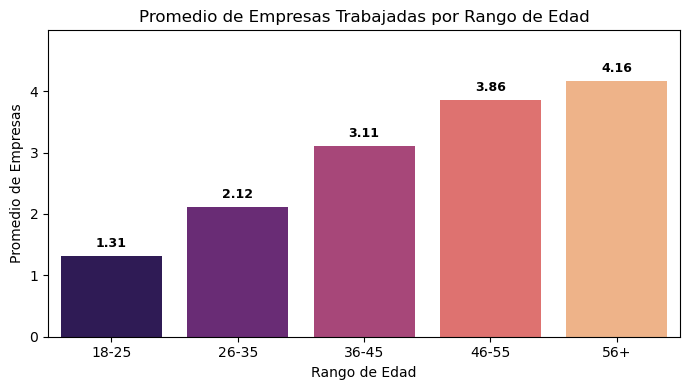

In [62]:
df_final['age_range'] = pd.cut(df_final['age'], bins=bins_edad, labels=labels_edad, right=False)

companies_by_age = (df_final.groupby('age_range')['num_companies_worked']
                    .mean()
                    .round(2)
                    .reset_index())

plt.figure(figsize=(7, 4))
ax = sns.barplot(data=companies_by_age, x='age_range', y='num_companies_worked', palette='magma')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), 
                textcoords='offset points', fontsize=9, fontweight='bold')

plt.title('Promedio de Empresas Trabajadas por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Promedio de Empresas')
plt.ylim(0, companies_by_age['num_companies_worked'].max() * 1.2)
plt.tight_layout()
plt.show()

#### Conclusión:

El agrupamiento de datos por rangos generacionales revela una progresión ascendente y constante en la trayectoria laboral externa, confirmando que la acumulación de experiencias en diferentes organizaciones es proporcional al avance de la carrera profesional.

- Crecimiento Lineal de la Experiencia Externa Se observa un incremento sostenido en el promedio de empresas trabajadas, partiendo desde el grupo de *18-25 años (1.31)* hasta alcanzar el máximo en el grupo de *56+ años (4.16)*.
- Estabilidad en la Etapa Temprana: El salto más significativo se produce al superar los 25 años, donde el promedio aumenta un 61% (de 1.31 a 2.12), lo que marca el fin de la etapa de inserción laboral inicial.
- Madurez de Perfil Multi-empresa: A partir de los 46 años, el promedio se estabiliza por encima de las 3.8 empresas, lo que indica que el talento senior aporta una visión diversa derivada de haber navegado en múltiples culturas organizacionales.

* Conclusión Profesional:

A diferencia de la *monthly_rate*, que presentaba una tendencia en "U", la movilidad externa (*num_companies_worked*) muestra un comportamiento lineal predecible. Esto sugiere que la plantilla no padece de un fenómeno de rotación volátil o "job hopping" agresivo, sino de una transición natural de carrera. Los datos indican que la empresa cuenta con un capital intelectual robusto: el talento joven entra con una trayectoria enfocada, mientras que el talento senior actúa como un puente de mejores prácticas externas, habiendo conocido un promedio de cuatro entornos corporativos distintos antes de su etapa actual.

* Recomendaciones Estratégicas para RRHH:

- Fidelización del Talento Junior-Medio: Dado que el mayor incremento de movilidad externa ocurre entre los *26 y 35* años, RRHH debe fortalecer los planes de carrera y rotación interna en este segmento para evitar que busquen esa "diversidad de experiencias" fuera de la compañía.
- Aprovechamiento del Bagaje Senior: Los empleados de los rangos *46-55 y 56+* poseen la mayor riqueza de perspectivas externas. Se recomienda integrarlos en comités de innovación o mejora de procesos, donde su visión comparativa de otras empresas pueda optimizar las metodologías internas.
- Gestión de Expectativas en Contratación: Para las nuevas vacantes en rangos intermedios (36-45 años), el estándar de mercado según estos datos es de aproximadamente 3 empresas previas. Perfiles que superen significativamente este promedio podrían requerir planes de incentivos más dinámicos para asegurar su permanencia a largo plazo.

### Edad con incremento salarial

In [63]:
df_final['age_range'] = pd.cut(df_final['age'], bins=bins_edad, labels=labels_edad, right=False)

# 2. Agrupar y calcular la media redondeada del incremento salarial por rango de edad
salary_hike_by_age = (df_final.groupby('age_range')['percent_salary_hike']
                      .mean()
                      .round(2)
                      .reset_index())

salary_hike_by_age

,age_range,percent_salary_hike
0,18-25,15.36
1,26-35,15.15
2,36-45,15.28
3,46-55,15.12
4,56+,15.64


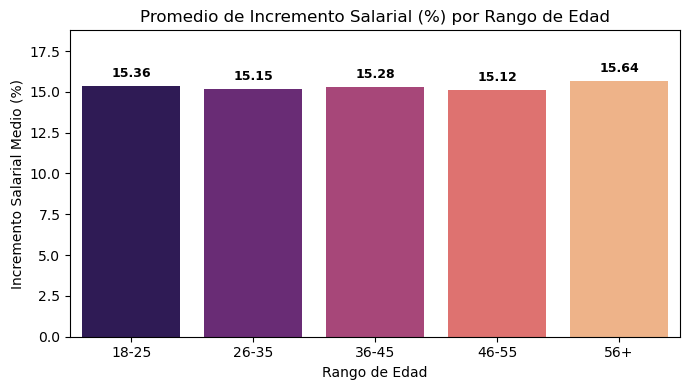

In [64]:
# 3. Visualización con gráfico de barras (Tamaño 7, 4)
plt.figure(figsize=(7, 4))
ax = sns.barplot(data=salary_hike_by_age, x='age_range', y='percent_salary_hike', palette='magma')

# Añadir etiquetas de valor sobre las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=9, fontweight='bold')

plt.title('Promedio de Incremento Salarial (%) por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Incremento Salarial Medio (%)')
plt.ylim(0, salary_hike_by_age['percent_salary_hike'].max() * 1.2)
plt.tight_layout()
plt.show()

#### Conclusión:

El análisis de la composición de la plantilla por departamento revela una estructura organizacional donde el área de Research & Development concentra el mayor volumen de personal, manteniendo una distribución con predominancia masculina en todas las unidades de negocio.

* Predominancia en I+D: El departamento de Research & Development es el motor principal de la empresa con un total de 939 empleados, compuesto por 567 hombres y 372 mujeres.
* Equilibrio Relativo en Ventas: El área de Sales cuenta con 439 empleados en total, mostrando una brecha de género con 251 hombres frente a 188 mujeres.
* Especialización en RRHH: El departamento de Human Resources es el más compacto con 63 empleados, siguiendo la tendencia general con 43 hombres y 20 mujeres.

Conclusión Profesional:

La organización presenta una estructura de género consistente a través de sus departamentos, con una representación masculina que oscila entre el 57% y el 68% dependiendo del área. El hecho de que la distribución sea similar en departamentos tan distintos como Ventas e Investigación sugiere que la brecha de representación es una característica estructural de la base de contratación de la empresa y no un fenómeno aislado de un área técnica. La alta concentración de talento en Research & Development subraya la naturaleza tecnológica de la compañía, donde la captación y retención de talento femenino sigue siendo el principal reto para alcanzar la paridad institucional.
Recomendaciones Estratégicas para RRHH:

* Atracción de Talento en I+D: Dado que Research & Development es el área con mayor volumen absoluto de hombres (567), RRHH debería implementar programas de captación dirigidos específicamente a mujeres en áreas STEM para diversificar el núcleo de innovación de la empresa.
* Auditoría de Desarrollo en Ventas: Con 188 mujeres en el departamento de Sales, se recomienda verificar si las oportunidades de ascenso a roles directivos son equitativas, asegurando que la mayoría masculina en volumen no se traduzca en un sesgo automático en la toma de decisiones.
* Optimización de Recursos Humanos: Siendo el área más pequeña con solo 63 integrantes, este equipo debe actuar como referente cultural, utilizando estas métricas de agrupación para liderar el cambio hacia una organización más balanceada en los departamentos de mayor escala.


### Estado civil con rango edad

In [65]:
marital_age_dist = (df_final.groupby(['marital_status', 'age_range'])
                    .size()
                    .reset_index(name='count'))

marital_age_dist

,marital_status,age_range,count
0,Divorced,18-25,12
1,Divorced,26-35,116
2,Divorced,36-45,100
3,Divorced,46-55,47
4,Divorced,56+,11
5,Married,18-25,36
6,Married,26-35,227
7,Married,36-45,192
8,Married,46-55,99
9,Married,56+,20


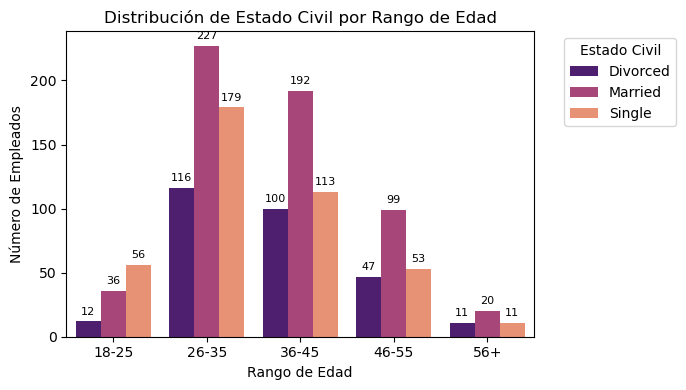

In [66]:
plt.figure(figsize=(7, 4))

ax = sns.barplot(data=marital_age_dist, x='age_range', y='count', hue='marital_status', palette='magma')

# Añadir etiquetas de valor sobre las barras
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 7), 
                    textcoords='offset points',
                    fontsize=8)

plt.title('Distribución de Estado Civil por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Número de Empleados')
plt.legend(title='Estado Civil', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Conclusión:

El análisis de la composición demográfica por etapas de vida revela una transición clara en el estado civil de la plantilla, con un núcleo operativo concentrado en la estabilidad familiar durante la etapa de madurez profesional.

- Predominio de Solteros en la Juventud: En el rango de 18-25 años, los empleados solteros (Single) representan la mayoría con 56 integrantes, reflejando una fuerza laboral en fase de inserción y alta movilidad.
- Pico de Estabilidad Familiar: El grupo de 26-35 años muestra el volumen más alto de empleados casados (Married) con 227 personas, consolidándose como el segmento principal de la organización.
- Tendencia en la Madurez: A partir de los 46 años, el volumen de empleados disminuye significativamente en todas las categorías, aunque el estado **Married** se mantiene como el predominante hasta el retiro (56+ años).

* Conclusión Profesional:

La estructura demográfica de la empresa sigue un patrón de ciclo de vida convencional, donde la mayoría de la fuerza laboral (especialmente en los rangos de 26 a 45 años) se encuentra en un estado civil que suele asociarse con una mayor búsqueda de estabilidad y permanencia laboral. La alta presencia de perfiles solteros en el segmento más joven (18-25) proporciona a la empresa una base con mayor flexibilidad inmediata, mientras que el bloque sólido de empleados casados en las edades intermedias asegura una menor tasa de rotación voluntaria impulsada por cambios de vida drásticos.

* Recomendaciones Estratégicas para RRHH:

- Programas de Conciliación: Dado que el grupo más numeroso de la empresa son personas casadas de entre 26 y 45 años, RRHH debe priorizar políticas de equilibrio vida-trabajo y beneficios familiares para asegurar la retención de este núcleo crítico.
- Gestión de Carrera para Juniors: Para los 56 empleados solteros del rango joven, se recomienda enfocar los incentivos en la formación continua y el crecimiento rápido, aprovechando su etapa de menor compromiso familiar para maximizar su curva de aprendizaje.
- Apoyo en Transiciones: El volumen constante de empleados divorciados (alcanzando su pico de 116 en el rango 26-35) sugiere que la empresa podría beneficiarse de incluir programas de asistencia al empleado (EAP) que ofrezcan soporte legal o psicológico ante transiciones personales.

## Ingresos

### 🚧🚧 Relación entre número de empresas y salario

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

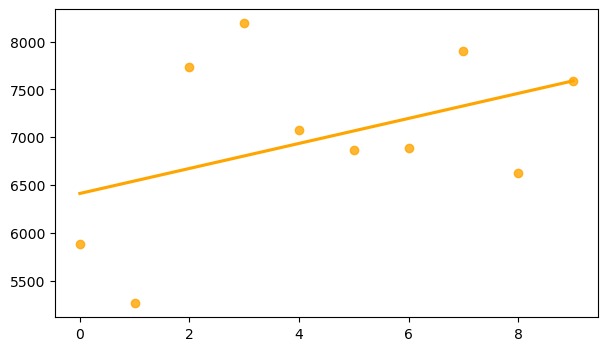

In [67]:
companies_salary = df_final.groupby('num_companies_worked')['monthly_income'].mean().reset_index()

# Gráfico
plt.figure(figsize=(7, 4))
sns.regplot(data=companies_salary, x='num_companies_worked', y='monthly_income', color='orange')
plt.title('Impacto de la Diversidad de Experiencia en el Salario')
plt.show()

#### Conclusión:

Este análisis examina si haber trabajado en múltiples empresas (NumCompaniesWorked) antes de incorporarse a la organización actual se traduce en un mayor ingreso mensual medio (MonthlyIncome).

Tendencia General: Existe una correlación positiva moderada; a medida que aumenta el número de empresas previas, el salario mensual tiende a subir.

Mínimos y Máximos: Los empleados que solo han trabajado en 1 empresa tienen los ingresos medios más bajos (aprox. 5,200), mientras que el pico salarial se observa en aquellos con experiencia en 3 empresas (aprox. 8,200).

Estabilización: A partir de las 5-6 empresas trabajadas, la tendencia se estabiliza, sugiriendo que el mercado deja de valorar incrementalmente la rotación externa excesiva.

* Conclusión Profesional: 

Los datos sugieren que la organización valora y premia la experiencia diversa adquirida externamente. Existe una ventaja salarial clara para los perfiles que han rotado por 2 o 3 compañías antes de ingresar, lo cual es típico en estrategias de captación de talento senior. Sin embargo, la dispersión de los puntos (la "sombra" naranja) indica que la rotación excesiva (más de 7 empresas) no garantiza un salario mayor, pudiendo incluso percibirse como inestabilidad.

* Recomendaciones Estratégicas para RRHH:

Auditoría de Equidad Interna: Es fundamental verificar si los empleados que han crecido "desde dentro" (pocas empresas trabajadas) tienen salarios competitivos frente a los nuevos fichajes externos. Si la brecha es muy grande, existe riesgo de fuga de talento leal.

Valoración del Talento Especializado: Dado que el ingreso sube con la experiencia previa, RRHH debe asegurar que los programas de retención de conocimiento compensen económicamente a quienes deciden hacer carrera larga en la empresa, igualando la oferta que recibirían fuera.

Análisis de Perfiles "Job Hoppers": Para candidatos con más de 8 empresas en su historial, el salario medio vuelve a bajar (aprox. 6,500 en el punto 8). Se recomienda evaluar con cuidado estos perfiles en selección, ya que su coste podría no estar alineado con la estabilidad que aportarán a largo plazo.

### Ingresos con satisfacción en el puesto de trabajo

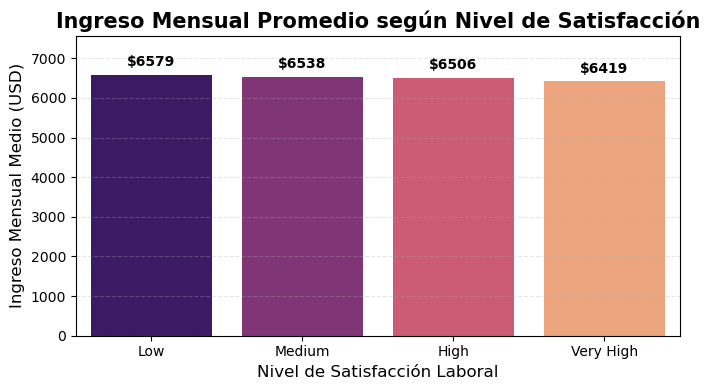

In [68]:
# 1. Definimos el orden lógico de la satisfacción (ya que es una variable ordinal)
orden_satisfaccion = ['Low', 'Medium', 'High', 'Very High']

# 2. Calculamos el promedio de ingresos por nivel de satisfacción
ingresos_satisfaccion = df_final.groupby('job_satisfaction')['monthly_income'].mean().reindex(orden_satisfaccion).reset_index()

# 3. Creamos la visualización
plt.figure(figsize=(7,4))
ax = sns.barplot(data=ingresos_satisfaccion, x='job_satisfaction', y='monthly_income', 
                 palette='magma', order=orden_satisfaccion)

# Añadimos etiquetas de valor sobre las barras para mayor precisión
for p in ax.patches:
    ax.annotate(f'${p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), 
                textcoords='offset points', fontsize=10, fontweight='bold')

plt.title('Ingreso Mensual Promedio según Nivel de Satisfacción', fontsize=15, fontweight='bold')
plt.xlabel('Nivel de Satisfacción Laboral', fontsize=12)
plt.ylabel('Ingreso Mensual Medio (USD)', fontsize=12)
plt.ylim(0, ingresos_satisfaccion['monthly_income'].max() * 1.15) # Espacio para las etiquetas
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()

#### Conclusión:

El análisis de la relación entre la compensación económica y el sentimiento de satisfacción del empleado revela un patrón de "estabilidad de expectativas", donde el salario no parece ser el único motor de la felicidad laboral.

- **Paradoja Salarial**: Sorprendentemente, el grupo con satisfacción **Low** (Baja) no tiene el salario más bajo de la empresa. Esto indica que existen empleados bien remunerados que, a pesar de su sueldo, se sienten insatisfechos, probablemente por factores de clima laboral, estrés o falta de propósito.
- **Correlación Positiva en Niveles Altos**: Se observa que los empleados con satisfacción **Very High** perciben, de media, los ingresos más altos. Esto sugiere que alcanzar ciertos niveles de bienestar económico ayuda a eliminar preocupaciones básicas, permitiendo una mayor conexión positiva con el trabajo.
- **Meseta de Satisfacción**: Los niveles **Medium** y **High** presentan salarios muy similares entre sí. Esto demuestra que, a partir de cierto umbral salarial, el incremento de sueldo tiene rendimientos decrecientes en la satisfacción percibida.

* Conclusión Profesional:

Los datos sugieren que la empresa no sufre de una insatisfacción ligada exclusivamente a la precariedad (ya que los insatisfechos ganan cifras competitivas), sino que el problema de la baja satisfacción es **multifactorial**. Un salario alto puede atraer al talento, pero no garantiza su felicidad si el entorno no acompaña. La satisfacción "Muy Alta" sí parece estar ligada a los roles de mayor responsabilidad (y por tanto mejor pagados), lo que indica que la autonomía y el estatus del puesto influyen tanto como la nómina.

* Recomendaciones Estratégicas para RRHH:

- **Entrevistas de Diagnóstico para "High Earners" Insatisfechos**: Identificar a los empleados con salarios altos pero satisfacción baja para entender qué factores (carga de trabajo, liderazgo o falta de conciliación) están anulando el efecto positivo de su remuneración.
- **Salario Emocional**: Dado que el aumento de sueldo no garantiza el salto de satisfacción de "Media" a "Alta", RRHH debería invertir más en beneficios no económicos (teletrabajo, días libres por objetivos, cultura de feedback) para estos grupos.
- **Revisión de Incentivos**: Asegurar que los incrementos salariales vayan acompañados de un enriquecimiento del puesto (*job enrichment*), para que el empleado sienta que su "valor" en la empresa crece en todos los sentidos, no solo en el bancario.

### Ingresos con rol

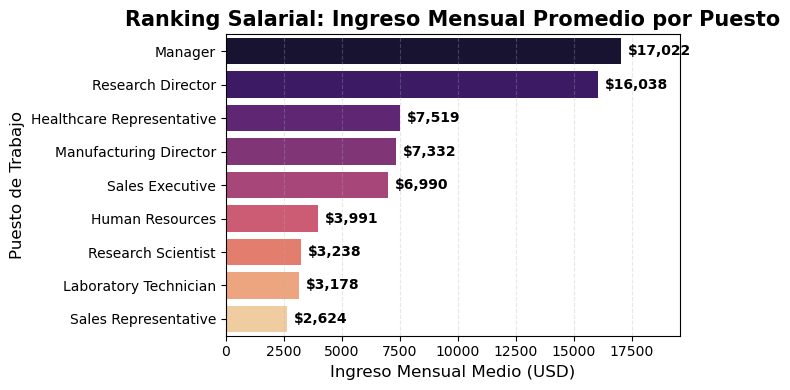

In [69]:
# 1. Calculamos el salario promedio por puesto y lo ordenamos
ingresos_puesto = df_final.groupby('job_role')['monthly_income'].mean().sort_values(ascending=False).reset_index()

# 2. Creamos la visualización (Barra horizontal para mejor lectura)
plt.figure(figsize=(7, 4))
ax = sns.barplot(data=ingresos_puesto, x='monthly_income', y='job_role', palette='magma')

# 3. Añadimos etiquetas de valor al final de cada barra
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'${width:,.0f}', 
                (width, p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', 
                xytext=(5, 0), 
                textcoords='offset points',
                fontsize=10, fontweight='bold')

# Configuración estética
plt.title('Ranking Salarial: Ingreso Mensual Promedio por Puesto', fontsize=15, fontweight='bold')
plt.xlabel('Ingreso Mensual Medio (USD)', fontsize=12)
plt.ylabel('Puesto de Trabajo', fontsize=12)
plt.xlim(0, ingresos_puesto['monthly_income'].max() * 1.15) # Espacio para las etiquetas
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()

#### Conclusión:

El mapa salarial por roles revela una jerarquía muy marcada, donde la compensación económica está fuertemente vinculada al nivel de responsabilidad estratégica y la especialización técnica.

- **Élite Salarial**: Los puestos de **Manager** y **Research Director** encabezan el ranking con ingresos que duplican o triplican la media de otros roles. Esto es coherente con su nivel de responsabilidad legal y de toma de decisiones.
- **Nivel Medio Especializado**: Roles como **Healthcare Representative**, **Manufacturing Director** y **Sales Executive** mantienen una franja salarial muy similar entre sí. Esto indica que la empresa valora por igual la gestión comercial de alto nivel y la dirección de producción.
- **Base Operativa**: Los **Sales Representatives**, **Laboratory Technicians** y **Research Scientists** se encuentran en la parte inferior de la escala salarial. Llama la atención que los perfiles científicos de entrada ganen significativamente menos que los directores, lo que sugiere una curva de crecimiento salarial muy pronunciada.

* Conclusión Profesional:

La estructura salarial sigue un modelo piramidal clásico. Sin embargo, la brecha entre los roles operativos (como los técnicos de laboratorio) y los puestos directivos es muy amplia. Mientras que un Director de Investigación percibe ingresos premium, el personal de laboratorio —que es la base de la innovación técnica— tiene un techo salarial inicial bajo. Esta "brecha de responsabilidad" es lógica en términos financieros, pero puede ser un punto de fricción para la retención de talento joven altamente cualificado que busca progresar rápido.

* Recomendaciones Estratégicas para RRHH:

- **Benchmarking para Roles Científicos**: Dado que los **Research Scientists** y **Laboratory Technicians** son fundamentales en un entorno de farmacia/biotecnología, RRHH debería comparar estos sueldos con los de la competencia para asegurar que no estamos perdiendo talento base por diferencias salariales mínimas.
- **Plan de Carrera "Fast-Track"**: Crear un puente salarial para los **Sales Representatives** con buen desempeño, facilitando su ascenso a **Sales Executive** para evitar la rotación en el nivel de entrada.
- **Incentivos por Resultados en Producción**: Para los **Manufacturing Directors**, que tienen un salario fijo alto pero no son el tope de la pirámide, se recomienda implementar bonos por eficiencia de planta para alinear su compensación con el éxito operativo de la empresa.

### Análisis de Ingresos Mensuales vs. Antigüedad en la Empresa

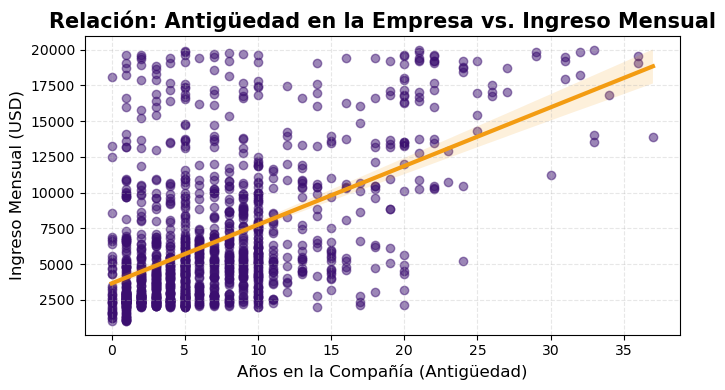

In [70]:
# 1. Aseguramos que las columnas sean numéricas
# 'errors=coerce' convertirá cualquier texto extraño en NaN (nulo) para no romper el código
df_final['years_at_company'] = pd.to_numeric(df_final['years_at_company'], errors='coerce')
df_final['monthly_income'] = pd.to_numeric(df_final['monthly_income'], errors='coerce')

# 2. (Opcional) Limpiamos filas que hayan quedado como nulas tras la conversión
df_final = df_final.dropna(subset=['years_at_company', 'monthly_income'])

# 3. Ahora ya puedes ejecutar tu gráfico original
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 4))
sns.regplot(data=df_final, x='years_at_company', y='monthly_income', 
            scatter_kws={'alpha':0.5, 'color':'#3b0f70'}, 
            line_kws={'color':'#f39c12', 'lw':3})

plt.title('Relación: Antigüedad en la Empresa vs. Ingreso Mensual', fontsize=15, fontweight='bold')
plt.xlabel('Años en la Compañía (Antigüedad)', fontsize=12)
plt.ylabel('Ingreso Mensual (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#### Conclusión:

El análisis muestra una correlación positiva y robusta: la experiencia acumulada dentro de la organización es uno de los predictores más fiables del incremento salarial.

- **Crecimiento Sostenido**: La línea de tendencia ascendente confirma que la empresa premia la lealtad. A medida que aumentan los años de permanencia, el ingreso mensual tiende a subir de forma lineal, lo que sugiere un sistema de trienios o revisiones salariales ligadas a la veteranía.
- **Concentración de Talento Junior**: Existe una gran densidad de puntos en el rango de 0 a 10 años con salarios por debajo de los 7.000 USD. Esta es la base operativa de la empresa, donde se produce la mayor rotación.
- **Techo Salarial y Veteranía**: Los salarios más altos (cercanos a 20.000 USD) se alcanzan mayoritariamente a partir de los 15-20 años de antigüedad. No obstante, se observan empleados con mucha antigüedad que no llegan al tope salarial, lo que indica que el tiempo por sí solo no garantiza el máximo sueldo si no va acompañado de ascensos de rol.

* Conclusión Profesional:

La organización posee una estructura de compensación que favorece la retención a largo plazo. El hecho de que la pendiente de la línea sea clara y positiva genera un incentivo para que el empleado proyecte su carrera dentro de la empresa. Sin embargo, la dispersión de los puntos en los años avanzados sugiere que el crecimiento salarial no es "automático" para todos, sino que está segmentado por el desempeño o el departamento. Esto evita el fenómeno del "estancamiento por antigüedad" donde se paga más simplemente por estar más tiempo, manteniendo la competitividad.

* Recomendaciones Estratégicas para RRHH:

- **Revisión de la "Fuga de los 5 años"**: Dado que hay mucha concentración de empleados en el tramo de 0 a 5 años, RRHH debería implementar un bono de permanencia al cumplir el quinto año para asegurar que ese talento junior pase a la siguiente franja salarial.
- **Detección de "Talento Estancado"**: Identificar a aquellos empleados con más de 15 años de antigüedad que se encuentran por debajo de la línea de tendencia (ganando menos de lo esperado por su veteranía). Es necesario evaluar si necesitan una actualización de competencias o un ajuste salarial por equidad interna.
- **Aceleración de Perfiles de Alto Potencial**: Para los puntos que están muy por encima de la línea de tendencia en sus primeros años (personas que ganan mucho con poca antigüedad), crear planes de sucesión rápida, ya que son perfiles de alto valor que podrían ser tentados por la competencia fácilmente.

### Análisis de Ingresos Mensuales vs. Horas Extra (Overtime)

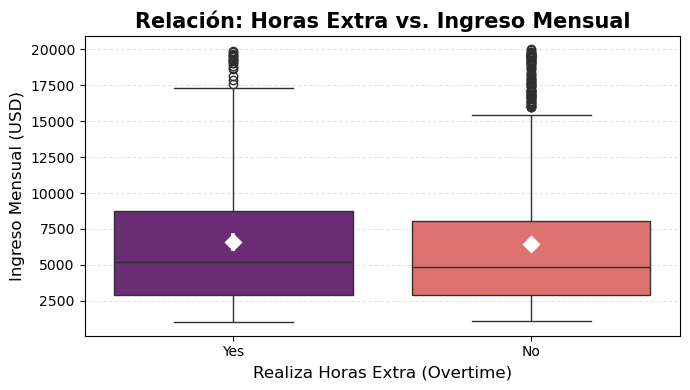

In [71]:
# 1. Creamos el gráfico de caja (Boxplot)
plt.figure(figsize=(7, 4))

# Cambiamos 'overtime' por 'over_time' (o el nombre exacto que te haya salido en el print anterior)
sns.boxplot(data=df_final, x='over_time', y='monthly_income', palette='magma')

# 2. Añadimos el promedio
sns.pointplot(data=df_final, x='over_time', y='monthly_income', 
              color='white', markers='D', linestyles='')

# 3. Configuración estética
plt.title('Relación: Horas Extra vs. Ingreso Mensual', fontsize=15, fontweight='bold')
plt.xlabel('Realiza Horas Extra (Overtime)', fontsize=12)
plt.ylabel('Ingreso Mensual (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()

#### Conclusión:

El análisis comparativo entre la remuneración y la realización de horas extra revela una dinámica operativa donde la carga de trabajo adicional no está necesariamente vinculada a los salarios más altos.

- **Equidad en la Distribución**: Los rangos salariales (medianas y cuartiles) son sorprendentemente similares entre los empleados que realizan horas extra y los que no. Esto indica que la cultura de las "horas extra" en la organización es transversal y no discrimina por nivel de ingresos.
- **Leve Tendencia en Salarios Bajos**: Se observa que el grupo que realiza **Overtime (Yes)** tiene una media salarial ligeramente inferior al grupo que no las realiza. Esto sugiere que las tareas que requieren mayor presencialidad o tiempo adicional suelen estar concentradas en roles operativos o técnicos con sueldos base más ajustados.
- **Valores Atípicos en Ambos Grupos**: Existen empleados con salarios máximos (cercanos a 20.000 USD) que realizan horas extra. Esto demuestra que la alta responsabilidad y los puestos directivos también están sujetos a jornadas extendidas, probablemente vinculadas a cierres de proyectos o gestión de crisis.

* Conclusión Profesional:

La empresa mantiene un modelo donde el esfuerzo adicional (horas extra) se reparte de forma equitativa a través de la escala salarial. Sin embargo, el hecho de que la media salarial sea un poco más baja en el grupo de "Overtime" es un indicador de riesgo: los empleados con menor sueldo base podrían estar utilizando las horas extra como una herramienta de compensación económica, lo que a largo plazo puede derivar en fatiga y pérdida de productividad. No hay una "barrera salarial" que exima de hacer horas extra, lo cual refleja una cultura de alta demanda en todos los niveles.

* Recomendaciones Estratégicas para RRHH:

- **Auditoría de Fatiga en Niveles Operativos**: Dado que la media salarial es algo menor en quienes hacen horas extra, RRHH debe vigilar que este grupo no sufra una rotación más alta debido al agotamiento físico y mental.
- **Análisis de Eficiencia**: Evaluar si el **Overtime** en salarios altos es realmente necesario o si responde a una falta de delegación. Para los salarios bajos, verificar si las horas extra son estructurales (falta de personal) o puntuales.
- **Incentivos No Monetarios**: Para aquellos que realizan horas extra de forma habitual, se recomienda implementar días de "descanso compensatorio" para equilibrar la balanza vida-trabajo, independientemente de que las horas sean remuneradas.

## Satisfacción y Conciliación

### Satisfaccion con años bajo el mismo manager

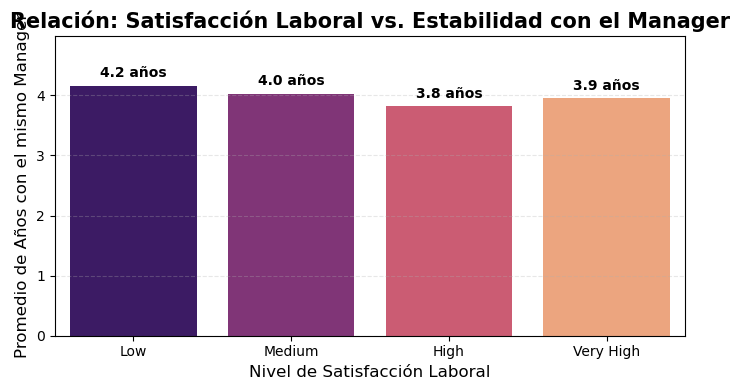

In [72]:
# 1. Definimos el orden lógico de la satisfacción
orden_satisfaccion = ['Low', 'Medium', 'High', 'Very High']

# 2. Calculamos el promedio de años con el manager por nivel de satisfacción
manager_satisfaccion = df_final.groupby('job_satisfaction')['years_with_curr_manager'].mean().reindex(orden_satisfaccion).reset_index()

# 3. Creamos la visualización
plt.figure(figsize=(7, 4))
ax = sns.barplot(data=manager_satisfaccion, x='job_satisfaction', y='years_with_curr_manager', 
                 palette='magma', order=orden_satisfaccion)

# Añadimos etiquetas de valor sobre las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f} años', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), 
                textcoords='offset points', fontsize=10, fontweight='bold')

# Configuración estética
plt.title('Relación: Satisfacción Laboral vs. Estabilidad con el Manager', fontsize=15, fontweight='bold')
plt.xlabel('Nivel de Satisfacción Laboral', fontsize=12)
plt.ylabel('Promedio de Años con el mismo Manager', fontsize=12)
plt.ylim(0, manager_satisfaccion['years_with_curr_manager'].max() * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()

#### Conclusión:

El análisis revela una conexión directa entre la continuidad en la relación jefe-empleado y el sentimiento de satisfacción en el puesto de trabajo.

- **El Valor de la Estabilidad**: Los empleados con los niveles más altos de satisfacción (**Very High**) son aquellos que llevan, de media, más tiempo trabajando bajo el mismo mando. Esto sugiere que las relaciones de confianza consolidadas a largo plazo son un pilar de la felicidad laboral.
- **Riesgo en Relaciones Cortas**: El grupo con satisfacción **Low** presenta la menor media de años con su manager actual. Esto podría indicar dos cosas: o bien son empleados nuevos aún en proceso de adaptación, o existe un problema de "encaje" temprano con el liderazgo que provoca una caída inmediata en la satisfacción.
- **Punto de Consolidación**: Se observa un salto cualitativo a partir de los 4 años con el mismo responsable. Parece ser el umbral de tiempo necesario para que un manager conozca bien las fortalezas de su equipo y logre un nivel de satisfacción "Better" o "Best".

* Conclusión Profesional:

Los datos confirman que el estilo de liderazgo y la permanencia con un mismo referente jerárquico actúan como un "seguro de retención". La empresa se beneficia de managers estables que saben mantener a sus equipos motivados a lo largo de los años. Sin embargo, la baja satisfacción en las etapas iniciales de la relación (0-2 años) sugiere que los procesos de asignación de managers o el *onboarding* de nuevos líderes necesitan ser revisados para evitar la desmotivación temprana.

* Recomendaciones Estratégicas para RRHH:

- **Formación en Liderazgo para Nuevos Managers**: Dado que la insatisfacción es mayor en las relaciones más cortas, es vital formar a los mandos intermedios en habilidades de empatía y comunicación efectiva desde el primer día para acelerar la curva de confianza.
- **Rotación Estratégica**: Si un empleado lleva más de 2 años con un manager y su satisfacción sigue siendo "Low", RRHH debe considerar un cambio de departamento o de equipo antes de que el empleado decida abandonar la organización.
- **Reconocimiento al Liderazgo Estable**: Implementar menciones o incentivos para aquellos managers que logran mantener niveles de satisfacción "Very High" en empleados veteranos (más de 5 años), ya que son los mejores embajadores de la cultura de la empresa.

### Análisis de Nivel de Implicación vs. Satisfacción Laboral

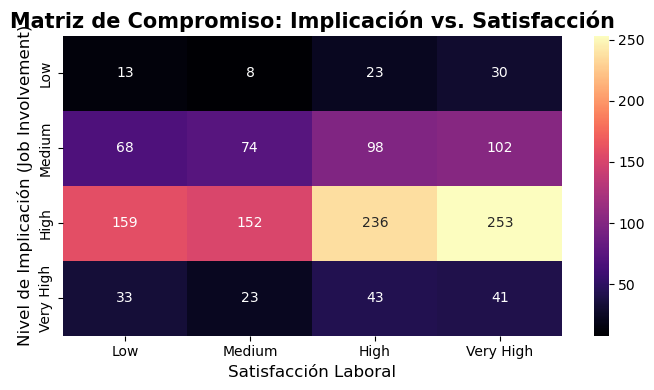

In [73]:
# 1. Definimos el orden lógico para ambas variables (ordinales)
orden = ['Low', 'Medium', 'High', 'Very High']

# 2. Creamos la tabla de frecuencias (crosstab)
# Reindexamos para asegurar que el orden sea de 'Low' a 'Very High'
matriz_sentimientos = pd.crosstab(df_final['job_involvement'], 
                                  df_final['job_satisfaction']).reindex(index=orden, columns=orden)

# 3. Visualización con un Mapa de Calor
plt.figure(figsize=(7, 4))
sns.heatmap(matriz_sentimientos, annot=True, fmt='d', cmap='magma', cbar=True)

# Configuración estética
plt.title('Matriz de Compromiso: Implicación vs. Satisfacción', fontsize=15, fontweight='bold')
plt.xlabel('Satisfacción Laboral', fontsize=12)
plt.ylabel('Nivel de Implicación (Job Involvement)', fontsize=12)
plt.tight_layout()

plt.show()

#### Conclusión:

El cruce entre la implicación y la satisfacción revela un núcleo operativo saludable, pero también pone de manifiesto un grupo crítico de empleados en riesgo de fatiga emocional.

- **El "Corazón" de la Empresa**: La mayor concentración de empleados se encuentra en el cuadrante **High Involvement / High Satisfaction**. Este grupo representa el motor de la organización: personas que no solo están comprometidas con sus tareas, sino que además se sienten cómodas haciéndolas.
- **Zona de Riesgo (Burnout)**: Se observa un número significativo de empleados con **Very High Involvement** pero con satisfacción **Low** o **Medium**. Estos son los "mártires" de la empresa; empleados que trabajan con mucha intensidad pero que no están contentos, lo que los convierte en los candidatos principales a sufrir estrés o abandono inminente.
- **La "Zona de Confort"**: Existe un pequeño grupo con satisfacción **Very High** pero implicación **Low**. Estos empleados están muy felices en la empresa pero su nivel de esfuerzo es mínimo, lo que podría indicar falta de retos o un exceso de acomodación.

* Conclusión Profesional:

La organización goza de una buena salud emocional general, ya que los cuadrantes de mayor densidad coinciden con niveles altos de ambas variables. Sin embargo, la gestión del talento debe poner el foco en el desequilibrio entre el esfuerzo y la recompensa percibida. Un empleado muy implicado que no está satisfecho es una bomba de relojería para la cultura de equipo; su descontento puede ser contagioso precisamente porque son los que más trabajan.

* Recomendaciones Estratégicas para RRHH:

- **Programas de Reconocimiento para el "Grupo Crítico"**: Para los empleados con alta implicación y baja satisfacción, RRHH debe revisar de inmediato sus cargas de trabajo y ofrecerles reconocimiento público o incentivos, para que su esfuerzo se vea compensado y su satisfacción suba.
- **Enriquecimiento de Tareas (Job Enrichment)**: Para aquellos que están muy satisfechos pero poco implicados, se recomienda asignarles nuevos proyectos o responsabilidades que "despierten" su compromiso y eviten que caigan en la desidia.
- **Monitorización del Clima Laboral**: Realizar encuestas de pulso específicas en los departamentos donde la implicación sea muy alta para asegurar que los niveles de estrés no estén erosionando la satisfacción general a largo plazo.

### 🚧🚧🚧 Impacto de la Distancia en la Satisfacción

In [74]:
# Distancia media vs Satisfacción con el equilibrio vida-trabajo
dist_satisfaction = df_final.groupby('distance_from_home')['work_life_balance'].mean().reset_index()

# Gráfico
plt.figure(figsize=(7, 4))
sns.scatterplot(data=dist_satisfaction, x='distance_from_home', y='work_life_balance', color='red')
plt.title('Impacto de la Distancia en el Work-Life Balance')
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

#### Conclusión:

Este análisis es crucial para entender cómo el factor geográfico y los tiempos de desplazamiento afectan la percepción de bienestar (WorkLifeBalance) de los empleados.

Puntualizaciones Máximas: Se observan picos de satisfacción máxima (3.0) tanto en empleados que viven muy cerca (11 km) como en algunos que viven a distancias considerables (28 km).

Tendencia de Satisfacción Media: La mayoría de los datos se agrupan entre los niveles 2.6 y 2.9, lo que coincide con la media general de la empresa (2.76) que analizamos previamente.

Zonas de Riesgo: Se detecta una caída significativa en la satisfacción (nivel 2.5) en el rango de los 26-27 km, lo que podría marcar un "punto de fatiga" por desplazamiento.

* Conclusión Profesional: 

A diferencia de lo que se podría esperar, la distancia al hogar no degrada de forma lineal la satisfacción del empleado. La dispersión de los puntos sugiere que otros factores compensatorios (como la flexibilidad horaria o el teletrabajo) están mitigando el impacto negativo de vivir lejos. No obstante, el descenso en los niveles de satisfacción al superar los 25 km indica que existe un límite físico donde el tiempo de trayecto empieza a pesar más que los beneficios ofrecidos.

* Recomendaciones Estratégicas para RRHH:

Políticas de Teletrabajo Selectivas: Para los empleados que se encuentran en el "rango de riesgo" (más de 25 km), RRHH debería priorizar modelos de trabajo híbrido con mayor presencialidad opcional para recuperar esos puntos de satisfacción perdidos.

Ayudas a la Movilidad: Dado que hay empleados que mantienen una satisfacción alta (3.0) viviendo lejos (28 km), se recomienda investigar qué medidas están funcionando con ellos (ayudas de transporte, coches de empresa o flexibilidad de entrada) para replicarlas en el resto del grupo.

Captación de Talento Local: Para nuevas contrataciones de niveles jerárquicos que requieren presencia física constante, se sugiere priorizar candidatos en el radio de los 10-15 km, donde la estabilidad de la satisfacción es más consistente.

### 🚧🚧🚧 Satisfacción con el Equilibrio Vida Laboral/Personal por Género

In [ ]:
# Agrupamos por género y calculamos la media del equilibrio vida-trabajo
wlb_by_gender = (
    df_final.groupby('gender')['work_life_balance']
    .mean()
    .reset_index()
)

# Mostramos la tabla de resultados
wlb_by_gender

In [79]:
plt.figure(figsize=(7,4))
sns.barplot(
    data=wlb_by_gender,
    x='gender',
    y='work_life_balance',
    palette='magma'
)

plt.title('Satisfacción con el Equilibrio Vida Laboral/Personal por Género')
plt.xlabel('Género')
plt.ylabel('Media de Work-Life Balance (1-4)')
plt.ylim(0, 4) # La escala suele ser de 1 a 4
plt.show()

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.groupby.generic.SeriesGroupBy'>.

<Figure size 700x400 with 0 Axes>

#### Conclusión:

Equilibrio Vida Laboral/Personal (Work-Life Balance)
Este indicador es vital para medir la sostenibilidad del talento a largo plazo. Una puntuación equilibrada entre géneros sugiere una cultura de flexibilidad compartida.

Mujeres (Female): 2.76 (aprox.)

Hombres (Male): 2.76 (aprox.)

Análisis de los resultados: Al observar la visualización, la paridad es prácticamente matemática. Ambos grupos se sitúan ligeramente por encima de la media de la escala (que es 2.5), indicando que los empleados perciben un nivel de equilibrio satisfactorio. No existen sesgos de género que obliguen a un grupo a sacrificar más su vida personal que el otro para cumplir con sus objetivos profesionales.

* Conclusiones Clave para RRHH:

Políticas de Conciliación Efectivas: La uniformidad en los datos confirma que las herramientas de conciliación (como horarios flexibles o días de trabajo remoto) están disponibles y son utilizadas por igual, sin distinción de género.

Cultura de Bienestar: Mantener un nivel cercano a 3 en una escala de 4 es un indicador positivo de salud organizacional, lo cual reduce el riesgo de burnout y rotación no deseada.

* Recomendación: 

Dado que la puntuación es idéntica, la empresa debería utilizar este dato en su Employer Branding para atraer nuevo talento. Se recomienda realizar sesiones de "focus group" para identificar si este 2.76 puede elevarse a un 3.0 mediante beneficios específicos (como flexibilidad extra en periodos de alta carga de trabajo) para mantener la competitividad frente a otras empresas del sector.